# Text Analytics: Salary Prediction Project

### Hannah Wang
### JaeYoon Lee
---

# 1. Data Pre-Processing & EDA

### Filter Salary Outliers

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/jaeyoonlee/Desktop/postings.csv')

# Remove salary values that are zero or above 1 million
filtered_data = data[(data['salary'] > 0) & (data['salary'] <= 1_000_000)]

# Calculate IQR (Interquartile Range)
q1 = filtered_data['salary'].quantile(0.25)
q3 = filtered_data['salary'].quantile(0.75)
iqr = q3 - q1

# Set the salary range
min_salary = 15000
upper_bound = q3 + iqr

# Filter the dataset within the specified range
df = filtered_data[(filtered_data['salary'] >= min_salary) & (filtered_data['salary'] <= upper_bound)]

# Calculate statistics for the original and filtered datasets
original_statistics = data['salary'].describe()
filtered_statistics = df['salary'].describe()

# Compile statistics into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original Data': original_statistics,
    'Filtered Data': filtered_statistics
})

# Display the comparison
print(comparison_df)


       Original Data  Filtered Data
count   2.790000e+04   26127.000000
mean    2.177040e+05   88243.956678
std     5.426284e+06   42658.265383
min     0.000000e+00   15000.000000
25%     5.200000e+04   51480.000000
50%     8.296600e+04   80000.000000
75%     1.250000e+05  119030.000000
max     5.356000e+08  198000.000000


### Basic EDA

Available columns: ['title', 'description', 'company', 'salary', 'work_type', 'location', 'industry', 'experience_level']
Starting Exploratory Data Analysis...


=== Dataset Basic Information ===
Number of job postings: 26127

Missing values:
Series([], dtype: float64)

Salary Statistics:
count     26127.000000
mean      88243.956678
std       42658.265383
min       15000.000000
25%       51480.000000
50%       80000.000000
75%      119030.000000
max      198000.000000
Name: salary, dtype: float64

Work Type Distribution:
work_type
FULL_TIME     20717
CONTRACT       3161
PART_TIME      1643
TEMPORARY       321
INTERNSHIP      167
OTHER           115
VOLUNTEER         3
Name: count, dtype: int64

Top 10 Industries:
industry
Staffing and Recruiting          7607
Hospitals and Health Care        2333
IT Services and IT Consulting    2152
Retail                           1444
Software Development             1194
Financial Services                855
Government Administration         554
H

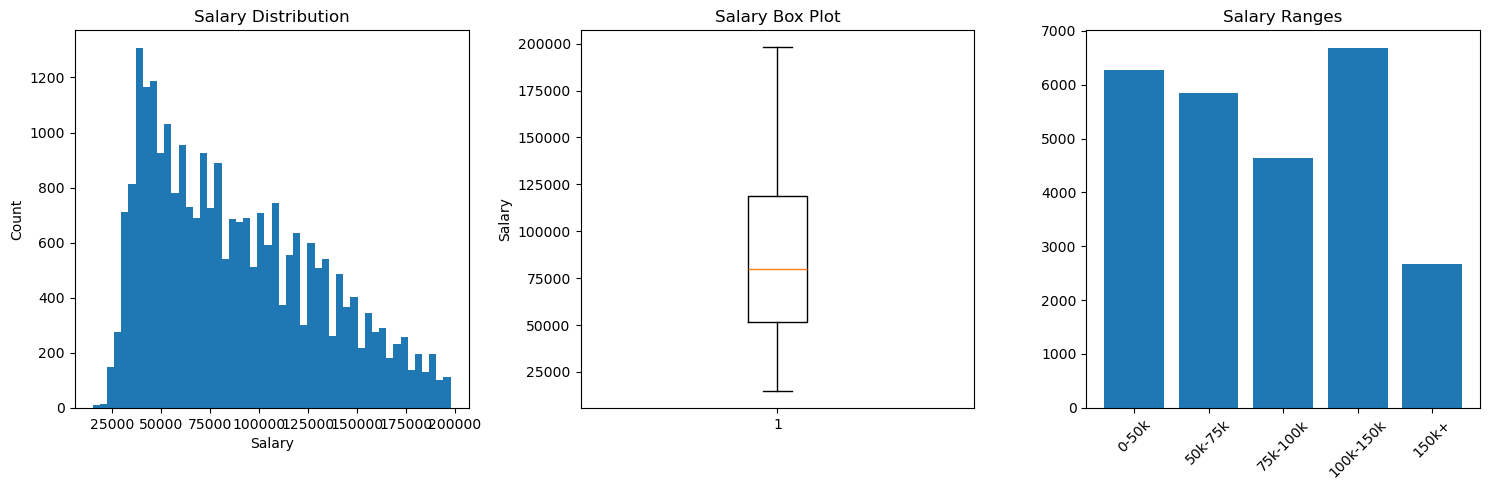


Analyzing work types...


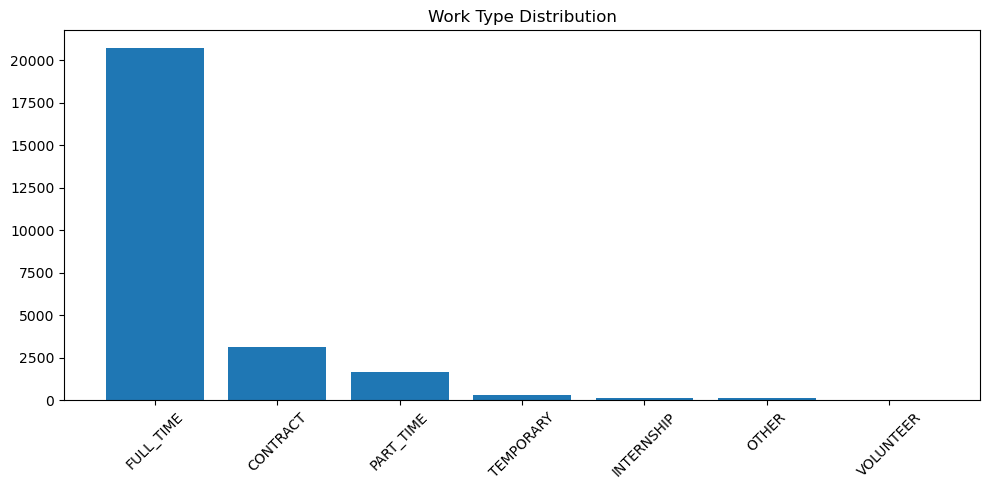


Average Salary by Work Type:
work_type
CONTRACT      98041.490308
FULL_TIME     89740.568224
TEMPORARY     71920.546106
OTHER         69708.250087
PART_TIME     58390.541150
INTERNSHIP    55726.857485
VOLUNTEER     46788.333333
Name: salary, dtype: float64

Analyzing industries...


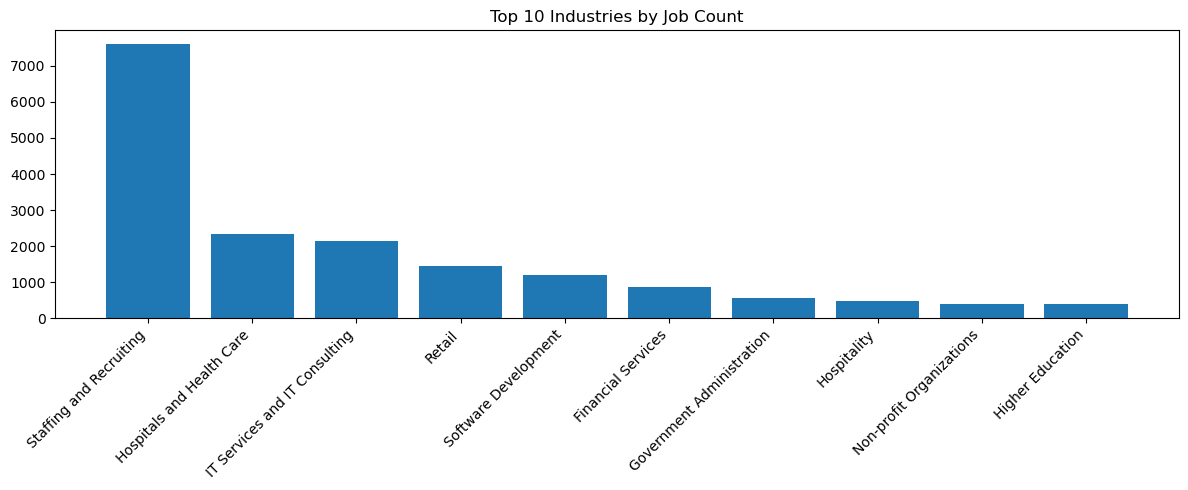


Top 10 Industries by Average Salary:
                                                        mean  count
industry                                                           
Venture Capital and Private Equity Principals  139331.800000      5
Semiconductor Manufacturing                    129253.293525     61
Computers and Electronics Manufacturing        129145.616667     24
Investment Banking                             128688.888889      9
Computer and Network Security                  127501.118699     73
Renewable Energy Semiconductor Manufacturing   120954.061644     73
Defense and Space Manufacturing                120849.188250    260
Technology, Information and Internet           120167.120370     54
Online Audio and Video Media                   118124.909524     21
Biotechnology Research                         116180.082877    146

Analyzing locations...


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_13759/1134729867.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['state'] = self.df['location'].str.extract(r', (\w{2})$')


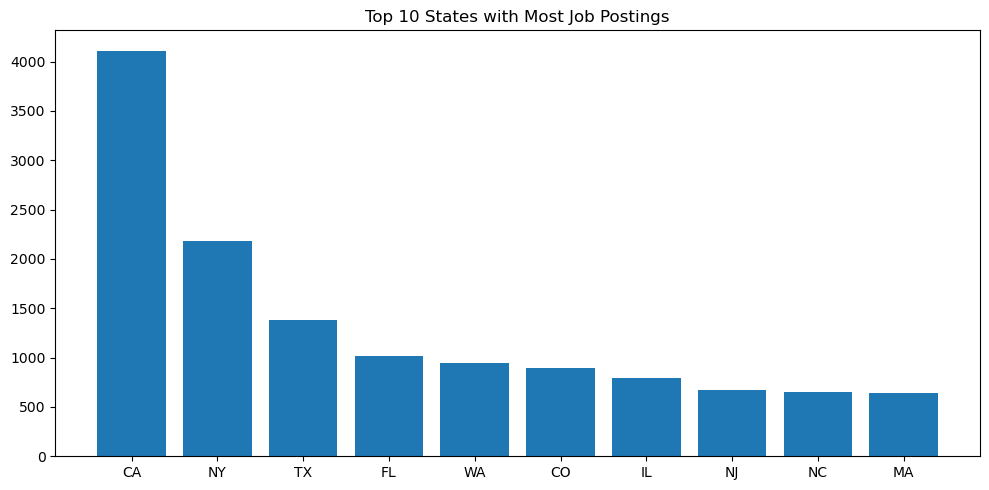


Average Salary by State (Top 10):
                mean  count
state                      
DC     101404.777841    227
NJ      95705.082733    675
AK      95680.677500     32
MA      94726.818053    637
CA      94155.187882   4112
WA      93564.819420    948
VA      91160.968467    610
NY      90487.196274   2182
DE      90433.619048     42
CT      90176.271510    255

EDA completed!


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class SimpleJobAnalysis:
    def __init__(self, csv_file):
        """Initialize with the CSV file path"""
        self.df = csv_file
        print("Available columns:", self.df.columns.tolist())
        
    def basic_info(self):
        """Display basic information about the dataset"""
        print("\n=== Dataset Basic Information ===")
        print(f"Number of job postings: {len(self.df)}")
        print(f"\nMissing values:")
        missing = (self.df.isnull().sum() / len(self.df) * 100).round(2)
        print(missing[missing > 0])
        
        print("\nSalary Statistics:")
        print(self.df['salary'].describe())
        
        if 'work_type' in self.df.columns:
            print("\nWork Type Distribution:")
            print(self.df['work_type'].value_counts())
            
        if 'industry' in self.df.columns:
            print("\nTop 10 Industries:")
            print(self.df['industry'].value_counts().head(10))

    def plot_salary_distribution(self):
        """Plot salary-related visualizations"""
        plt.figure(figsize=(15, 5))
        
        # Salary histogram
        plt.subplot(1, 3, 1)
        plt.hist(self.df['salary'].dropna(), bins=50)
        plt.title('Salary Distribution')
        plt.xlabel('Salary')
        plt.ylabel('Count')
        
        # Box plot of salaries
        plt.subplot(1, 3, 2)
        plt.boxplot(self.df['salary'].dropna())
        plt.title('Salary Box Plot')
        plt.ylabel('Salary')
        
        # Salary range distribution
        ranges = pd.cut(self.df['salary'], 
                       bins=[0, 50000, 75000, 100000, 150000, float('inf')],
                       labels=['0-50k', '50k-75k', '75k-100k', '100k-150k', '150k+'])
        range_counts = ranges.value_counts().sort_index()
        
        plt.subplot(1, 3, 3)
        plt.bar(range(len(range_counts)), range_counts.values)
        plt.title('Salary Ranges')
        plt.xticks(range(len(range_counts)), range_counts.index, rotation=45)
        
        plt.tight_layout()
        plt.show()

    def analyze_work_types(self):
        """Analyze work types"""
        if 'work_type' not in self.df.columns:
            print("No work_type column found.")
            return
            
        plt.figure(figsize=(10, 5))
        
        # Work type distribution
        work_type_counts = self.df['work_type'].value_counts()
        plt.bar(range(len(work_type_counts)), work_type_counts.values)
        plt.title('Work Type Distribution')
        plt.xticks(range(len(work_type_counts)), work_type_counts.index, rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Average salary by work type
        print("\nAverage Salary by Work Type:")
        print(self.df.groupby('work_type')['salary'].mean().sort_values(ascending=False))

    def analyze_industries(self):
        """Analyze industries"""
        if 'industry' not in self.df.columns:
            print("No industry column found.")
            return
            
        # Top industries by count
        top_industries = self.df['industry'].value_counts().head(10)
        
        plt.figure(figsize=(12, 5))
        plt.bar(range(len(top_industries)), top_industries.values)
        plt.title('Top 10 Industries by Job Count')
        plt.xticks(range(len(top_industries)), top_industries.index, rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Average salary by industry
        print("\nTop 10 Industries by Average Salary:")
        industry_stats = self.df.groupby('industry')['salary'].agg(['mean', 'count'])
        print(industry_stats[industry_stats['count'] >= 5]  # Minimum 5 jobs per industry
              .sort_values('mean', ascending=False)
              .head(10))

    def analyze_locations(self):
        """Analyze job locations"""
        if 'location' not in self.df.columns:
            print("No location column found.")
            return
            
        # Extract states from location
        self.df['state'] = self.df['location'].str.extract(r', (\w{2})$')
        
        # Top states
        top_states = self.df['state'].value_counts().head(10)
        
        plt.figure(figsize=(10, 5))
        plt.bar(range(len(top_states)), top_states.values)
        plt.title('Top 10 States with Most Job Postings')
        plt.xticks(range(len(top_states)), top_states.index)
        
        plt.tight_layout()
        plt.show()
        
        # Average salary by state
        print("\nAverage Salary by State (Top 10):")
        state_stats = self.df.groupby('state')['salary'].agg(['mean', 'count'])
        print(state_stats[state_stats['count'] >= 5]  # Minimum 5 jobs per state
              .sort_values('mean', ascending=False)
              .head(10))

    def perform_complete_eda(self):
        """Run all EDA analyses"""
        print("Starting Exploratory Data Analysis...\n")
        
        self.basic_info()
        
        print("\nGenerating salary distribution plots...")
        self.plot_salary_distribution()
        
        print("\nAnalyzing work types...")
        self.analyze_work_types()
        
        print("\nAnalyzing industries...")
        self.analyze_industries()
        
        print("\nAnalyzing locations...")
        self.analyze_locations()
        
        print("\nEDA completed!")

if __name__ == "__main__":
    # Update this path to your CSV file location
    csv_file = df
    
    # Create analysis object and run complete EDA
    analysis = SimpleJobAnalysis(csv_file)
    analysis.perform_complete_eda()

### Text Preprocessing

In [ ]:
from nltk.corpus import wordnet, stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

# Initialize with regular stopwords
stop_words = set(stopwords.words('english'))

def get_detailed_wordnet_pos(tag):
    """Get detailed part of speech for lemmatization"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun for unknown tags

def enhanced_clean_text(text, preserve_phrases=True):
    """Enhanced text cleaning with precise lemmatization"""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs and emails
    text = re.sub(r'http\S+|www\S+|https\S+|\S+@\S+', '', text)
    
    # Remove special characters but keep hyphens for compound words
    text = re.sub(r'[^a-zA-Z\s-]', ' ', text)
    
    # Handle hyphenated words
    text = re.sub(r'(?<![\w])-|-(?![\w])', ' ', text)
    
    # Standardize spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Get detailed POS tags
    tagged_tokens = pos_tag(tokens)
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Process tokens with context-aware lemmatization
    cleaned_tokens = []
    for i, (token, tag) in enumerate(tagged_tokens):
        # Skip if token is in stopwords or too short
        if token in stop_words or len(token) <= 2:
            continue
            
        # Get detailed POS tag
        pos = get_detailed_wordnet_pos(tag)
        
        # Apply lemmatization with POS tag
        lemma = lemmatizer.lemmatize(token, pos=pos)
        cleaned_tokens.append(lemma)
    
    return ' '.join(cleaned_tokens)

# First, check description lengths
print("\nChecking description lengths...")
df['description_length'] = df['description'].str.len()
original_count = len(df)
df = df[df['description_length'] >= 1000]
removed_count = original_count - len(df)
print(f"Removed {removed_count} rows with descriptions under 1000 characters")

# Apply enhanced cleaning with precise lemmatization
print("\nApplying enhanced text cleaning with precise lemmatization...")
df['cleaned_description'] = df['description'].apply(enhanced_clean_text)
df['cleaned_title'] = df['title'].apply(enhanced_clean_text)

# Print sample results
print("\nSample Results:")
sample_idx = 0
print("\nOriginal Title:", df['title'].iloc[sample_idx])
print("Cleaned Title:", df['cleaned_title'].iloc[sample_idx])
print("\nOriginal Description (first 200 chars):", df['description'].iloc[sample_idx][:200])
print("Cleaned Description (first 200 chars):", df['cleaned_description'].iloc[sample_idx][:200])

# Basic statistics
print("\nCleaning Statistics:")
print(f"Original number of rows: {original_count}")
print(f"Rows after removing short descriptions: {len(df)}")
print(f"Average cleaned description length: {df['cleaned_description'].str.len().mean():.2f} characters")
print(f"Average cleaned title length: {df['cleaned_title'].str.len().mean():.2f} characters")

# Save cleaned data
df.to_csv('cleaned_job_postings.csv', index=False)
print("\nSaved cleaned dataset to 'cleaned_job_postings.csv'")

### Cleaned Job Postings Word Frequency & Word Cloud

Reading cleaned job postings data...
Calculating word frequencies and IDF scores...

Top 20 Most Frequent Words:
            word  frequency
100         work      97184
92    experience      88557
43          team      65344
162      include      61030
148      service      48120
215     customer      44958
180      provide      44768
93         skill      42941
164      support      40827
157  opportunity      39937
199     position      39862
275          job      39401
7           year      39328
386     employee      38987
91       require      38559
28      business      38080
279      benefit      37646
206      ability      37460
428      company      36872
278          pay      35925

Top 20 Words with Highest IDF (most unique/specific words):
                        word       idf
65612         winningperform  9.396446
98766       locationsrespond  9.396446
53308       housinglicensure  9.396446
53307                   hilt  9.396446
53305             verbalhigh  9.396446
5330

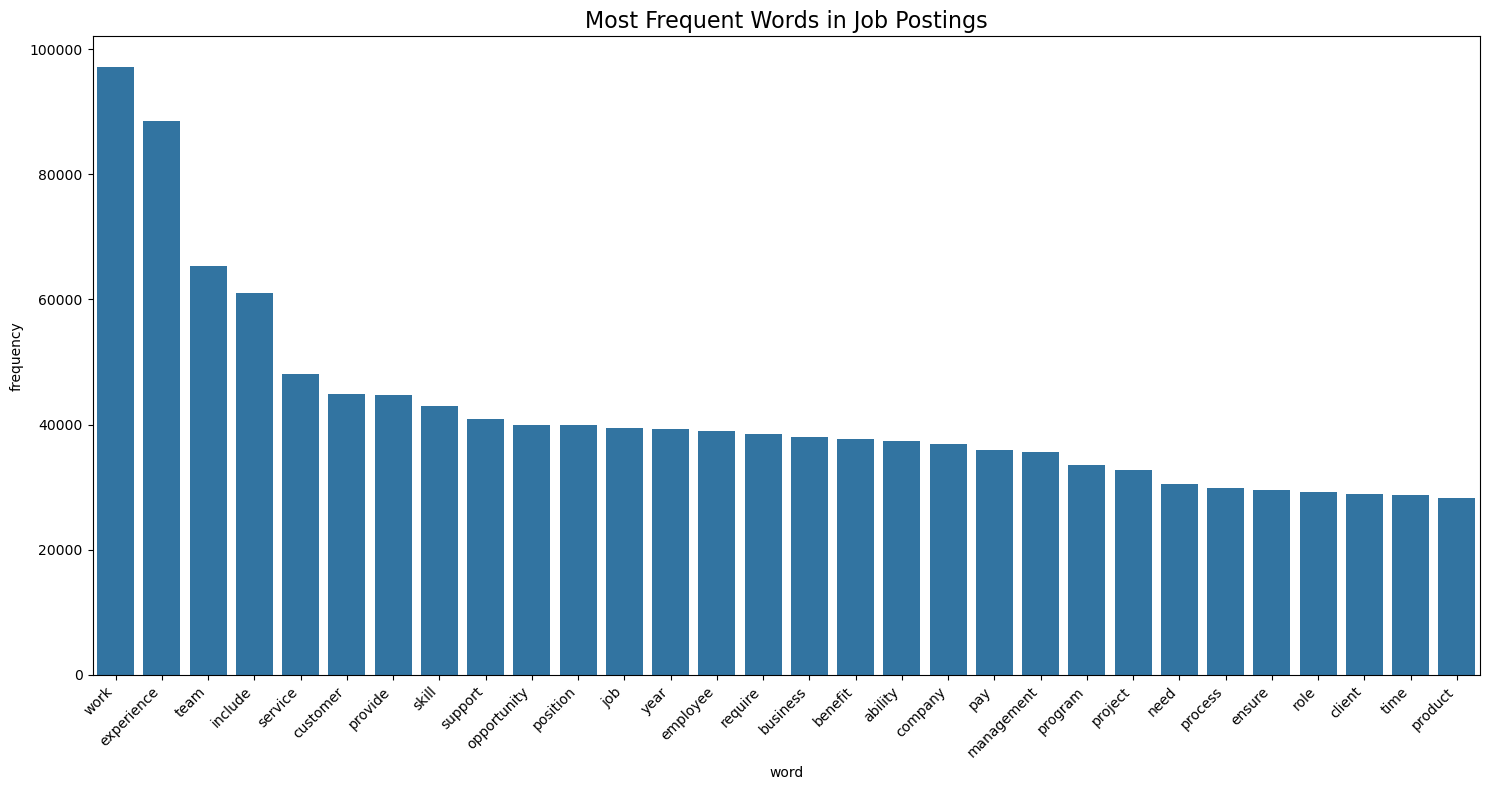

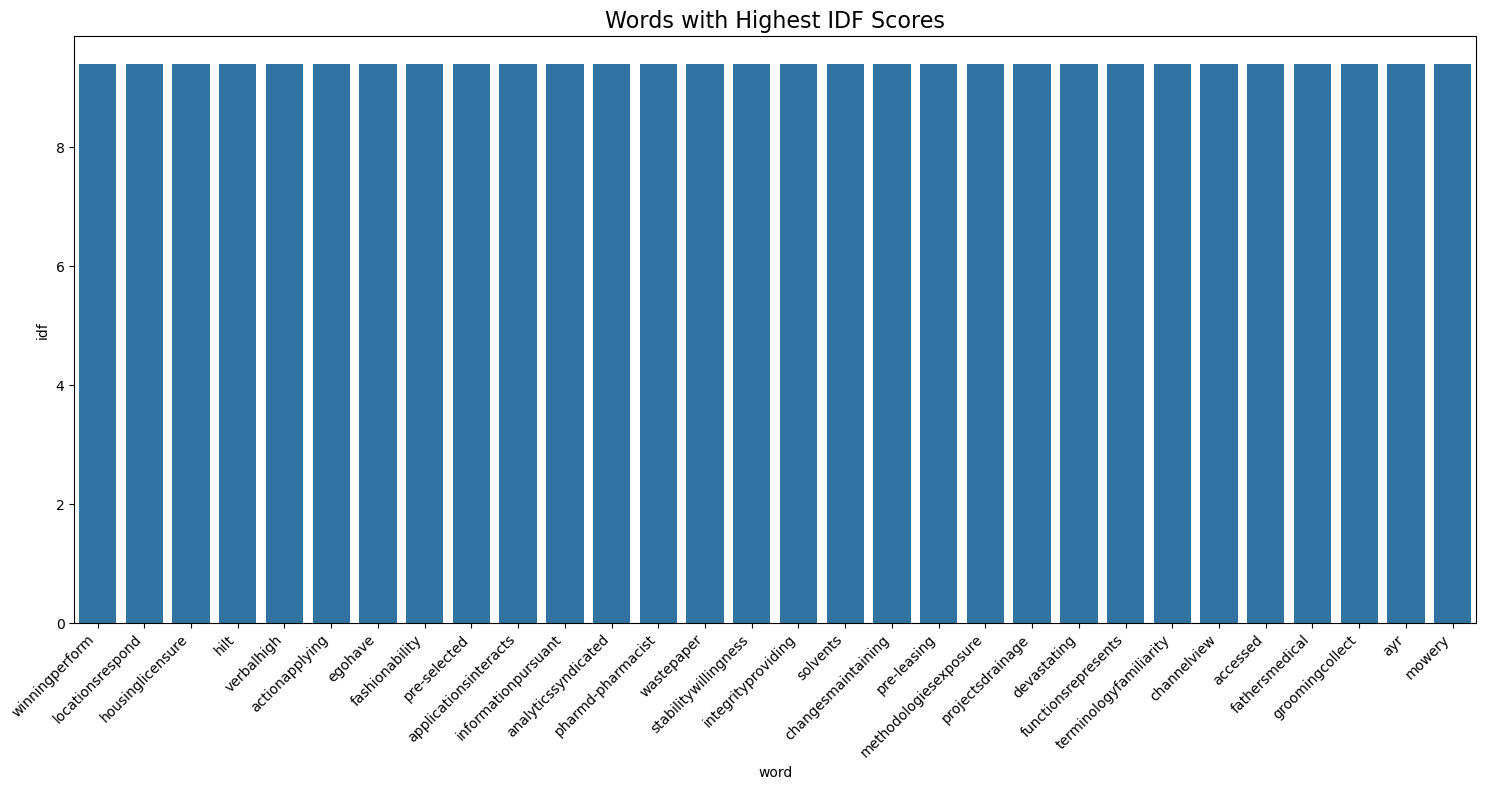

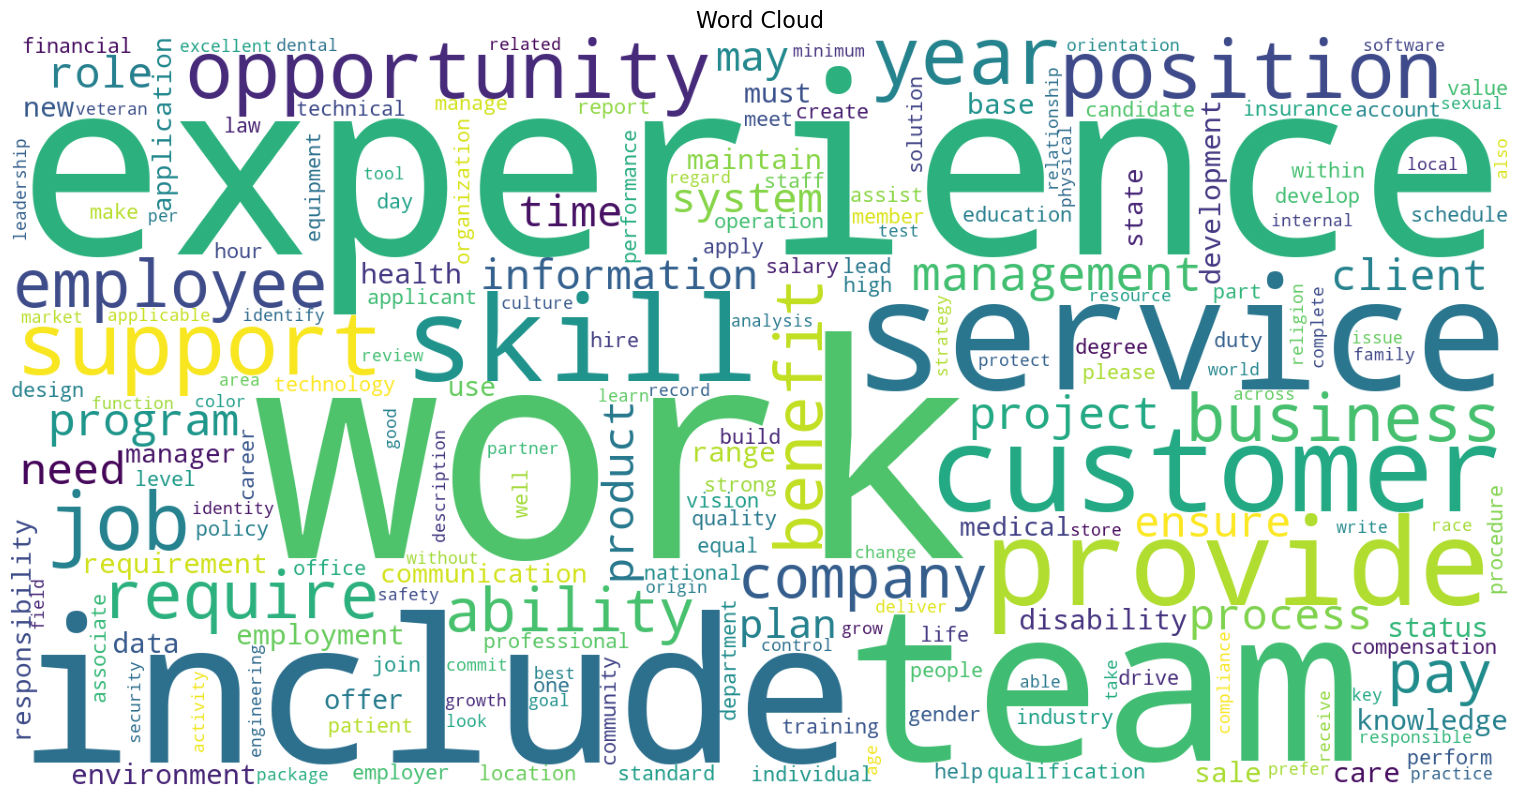

In [127]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import math

def calculate_word_frequencies(df, text_columns=['cleaned_title', 'cleaned_description']):
    """
    Calculate word frequencies across all documents
    """
    # Combine all text for overall frequency
    all_words = []
    document_words = []  # Keep track of words per document for IDF
    
    for _, row in df.iterrows():
        # Combine specified columns for this document
        doc_text = ' '.join(str(row[col]) for col in text_columns)
        words = doc_text.split()
        all_words.extend(words)
        document_words.append(set(words))  # Unique words per document
    
    # Calculate overall word frequencies
    word_freq = Counter(all_words)
    
    # Calculate IDF
    num_docs = len(df)
    word_idf = {}
    for word in set(all_words):
        # Count documents containing the word
        doc_count = sum(1 for doc_words in document_words if word in doc_words)
        idf = math.log(num_docs / (1 + doc_count))
        word_idf[word] = idf
    
    # Create DataFrames
    freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
    freq_df.index.name = 'word'
    freq_df = freq_df.reset_index()
    freq_df = freq_df.sort_values('frequency', ascending=False)
    
    idf_df = pd.DataFrame.from_dict(word_idf, orient='index', columns=['idf'])
    idf_df.index.name = 'word'
    idf_df = idf_df.reset_index()
    idf_df = idf_df.sort_values('idf', ascending=False)
    
    return freq_df, idf_df, word_freq

def plot_top_words(freq_df, top_n=30, title='Most Common Words'):
    """
    Create bar plot of top words
    """
    plt.figure(figsize=(15, 8))
    data = freq_df.head(top_n)
    sns.barplot(data=data, x='word', y='frequency')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

def plot_top_idf_words(idf_df, top_n=30, title='Words with Highest IDF Scores'):
    """
    Create bar plot of words with highest IDF scores
    """
    plt.figure(figsize=(15, 8))
    data = idf_df.head(top_n)
    sns.barplot(data=data, x='word', y='idf')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

def create_wordcloud(word_freq, title='Word Cloud'):
    """
    Create word cloud visualization
    """
    plt.figure(figsize=(15, 8))
    wordcloud = WordCloud(
        width=1600, 
        height=800,
        background_color='white',
        min_font_size=10,
        max_words=200
    ).generate_from_frequencies(word_freq)
    
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout(pad=0)
    return plt.gcf()

# Main execution
def main():
    # Read the cleaned data
    print("Reading cleaned job postings data...")
    df = pd.read_csv('cleaned_job_postings.csv')
    
    # Calculate frequencies and IDF
    print("Calculating word frequencies and IDF scores...")
    freq_df, idf_df, word_freq = calculate_word_frequencies(df)
    
    # Display top and bottom frequency words
    print("\nTop 20 Most Frequent Words:")
    print(freq_df.head(20))
    print("\nTop 20 Words with Highest IDF (most unique/specific words):")
    print(idf_df.head(20))
    
    # Create and save visualizations
    print("\nCreating visualizations...")
    
    # Word frequency plot
    freq_fig = plot_top_words(freq_df, title='Most Frequent Words in Job Postings')

    
    # IDF plot
    idf_fig = plot_top_idf_words(idf_df, title='Words with Highest IDF Scores')

    
    # Word cloud
    cloud_fig = create_wordcloud(dict(zip(freq_df['word'], freq_df['frequency'])))

    
    print("\nVisualization files saved:")
    print("- word_frequency_plot.png")
    print("- word_idf_plot.png")
    print("- word_cloud.png")
    

    
    # Create a combined frequency-IDF analysis
    print("\nCreating combined frequency-IDF analysis...")
    combined_df = pd.merge(freq_df, idf_df, on='word')
    combined_df['tfidf'] = combined_df['frequency'] * combined_df['idf']
    combined_df = combined_df.sort_values('tfidf', ascending=False)
    
    print("\nTop 20 Words by TF-IDF Score (combining frequency and uniqueness):")
    print(combined_df.head(20))
    combined_df.to_csv('word_tfidf_analysis.csv', index=False)

    # Print some statistics
    print("\nWord Statistics:")
    print(f"Total unique words: {len(freq_df)}")
    print(f"Words appearing only once: {len(freq_df[freq_df['frequency'] == 1])}")
    print("\nWord Frequency Distribution:")
    print(freq_df['frequency'].describe())

if __name__ == "__main__":
    main()

In [133]:
file_path = "/Users/jaeyoonlee/Desktop/cleaned_job_postings.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,title,description,company,salary,work_type,location,company_size,industry,experience_level,description_length,cleaned_description,cleaned_title
0,0,"Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...","I.T. Solutions, Inc.",135200.0,CONTRACT,"Foster City, CA",3.0,IT Services and IT Consulting,Mid-Senior level,2084,validation engineer labware limsfoster city va...,validation engineer labware lims
1,1,Administrative Assistant - CONCUR,Global Financial Services firm is seeking an e...,ActOne Group,82500.0,FULL_TIME,"New York, NY",5.0,Information Services,Associate,1046,global financial service firm seek experienced...,administrative assistant concur
2,2,Customer Service Representative,We are seeking future agents to join our team!...,ABC Farigua Division,90000.0,FULL_TIME,"Greater Orlando, FL",3.0,Insurance,Entry level,1402,seek future agent join team look driven self-m...,customer service representative
3,3,Inbound Call Center Specialist,"Always Connecting, Always Evolving.\nIf you ar...",TECHEAD,38480.0,CONTRACT,"Richmond, VA",2.0,Staffing and Recruiting,Associate,3077,always connect always evolve look new opportun...,inbound call center specialist
4,4,Tool and Die Maker,Job Summary:The Tool and Die Maker will build ...,Prolink,69680.0,FULL_TIME,Cincinnati Metropolitan Area,4.0,Staffing and Recruiting,Associate,1067,job summary tool die maker build dy concept st...,tool die maker


In [134]:
df = df.dropna(subset=['cleaned_title'])
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0             0
title                  0
description            0
company                0
salary                 0
work_type              0
location               0
company_size           0
industry               0
experience_level       0
description_length     0
cleaned_description    0
cleaned_title          0
dtype: int64


---

# 2. Basic Model without Text Analytics: R square 0.515


Model Performance Metrics:
Mean Squared Error: $877,356,704.47
Root Mean Squared Error: $29,620.21
Mean Absolute Error: $22,581.15
R² Score: 0.515

Cross-validation R² scores: [0.47837808 0.445345   0.44999198 0.48612151 0.4464991 ]
Average CV R² score: 0.461 (+/- 0.035)


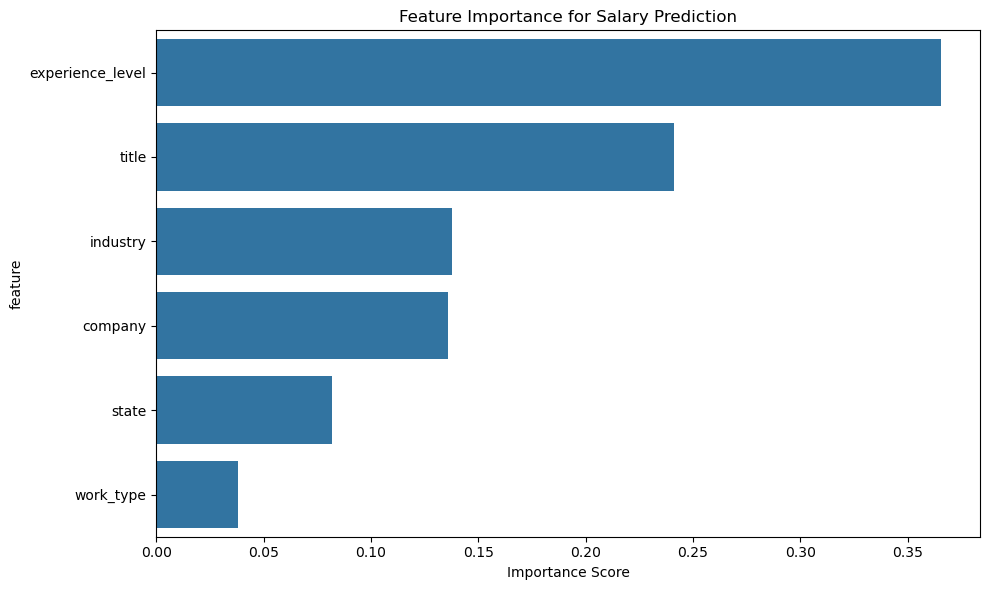


Feature Importance:
experience_level: 0.3653
title: 0.2412
industry: 0.1377
company: 0.1357
state: 0.0820
work_type: 0.0381


In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize label encoders
label_encoders = {}

# Feature engineering
def engineer_features(df):
    df_engineered = df.copy()
    
    # Extract state from location
    df_engineered['state'] = df_engineered['location'].apply(
        lambda x: x.split(',')[-1].strip() if ',' in str(x) else x
    )
    
    return df_engineered

# Preprocess data
def preprocess_data(df):
    df_processed = engineer_features(df)
    
    # Categorical columns to encode
    categorical_cols = [
        'title', 'company', 'work_type', 'location', 'industry', 
        'experience_level', 'state'
    ]
    
    # Encode categorical variables
    for col in categorical_cols:
        if col in df_processed.columns:
            label_encoders[col] = LabelEncoder()
            df_processed[col] = label_encoders[col].fit_transform(df_processed[col])
    
    return df_processed

# Select features for model
def select_features(df_processed):
    feature_cols = [
        'title', 'company', 'work_type', 'industry', 
        'experience_level', 'state'
    ]
    return df_processed[feature_cols]

# Process the data
df = pd.read_csv('/Users/jaeyoonlee/Desktop/enhanced_cleaned_job_postings.csv')
df_processed = preprocess_data(df)
X = select_features(df_processed)
y = df['salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")
print(f"\nCross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Calculate and plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Salary Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

### **Basic machine learning model: R² Score: 0.515**
### **Root Mean Squared Error: $29,620.21**
### **The relative RMSE is about 27% which is moderately high, ideally it should be less than 20%**
---

# 3. Text Analytics Skills

## Bag of Words (Skill Category)

Starting Comprehensive Analysis...

Analyzing Skills and Salaries...


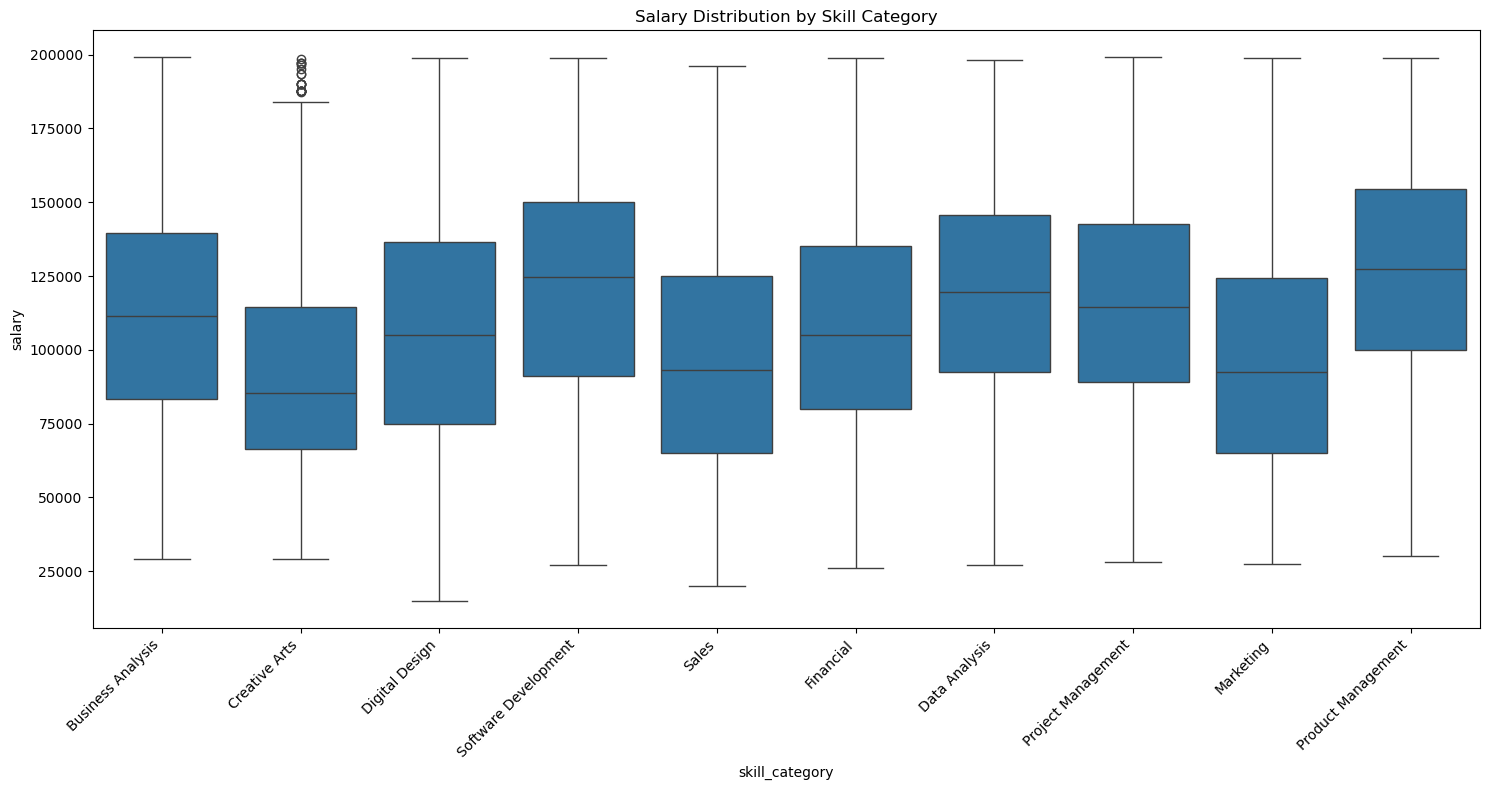


Skill Category Salary Analysis:
                      count  mean_salary  median_salary  salary_std  \
skill_category                                                        
Product Management     1948    125561.48      127500.00    38375.25   
Software Development   6889    120227.17      124800.00    40924.73   
Data Analysis          4094    119377.38      119600.00    36459.04   
Project Management     5020    115936.27      114400.00    36753.81   
Business Analysis      2548    112653.23      111500.00    37450.94   
Financial              2963    108173.73      105000.00    37165.91   
Digital Design         3894    106514.86      105000.00    40320.38   
Marketing              2094     98381.07       92571.60    41543.38   
Sales                  2767     98260.90       93000.00    41419.48   
Creative Arts          1015     94249.88       85500.00    36899.80   

                                                        common_keywords  
skill_category                          

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer

class JobTextAnalysis:
    def __init__(self, csv_file):
        """Initialize with the CSV file path"""
        self.df = csv_file
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Add custom stop words relevant to job postings
        self.stop_words.update([
            'experience', 'job', 'work', 'company', 'position', 'candidate',
            'required', 'requirements', 'qualified', 'ability', 'skills',
            'responsibilities', 'duties', 'role', 'team', 'years'
        ])
        
        # Define skill categories with comprehensive keywords
        self.skill_categories = {
            'Creative Arts': {
                'keywords': [
                    'adobe creative suite', 'photoshop', 'illustrator', 'indesign',
                    'graphic design', 'visual design', 'typography', 'art direction',
                    'creative direction', 'brand design', 'illustration', 'adobe xd',
                    'figma', 'sketch', 'color theory', 'layout design'
                ],
                'context_required': ['design', 'creative', 'art', 'visual']
            },
            'Digital Design': {
                'keywords': [
                    'ui design', 'ux design', 'user interface', 'user experience',
                    'wireframing', 'prototyping', 'responsive design', 'mobile design',
                    'web design', 'interaction design', 'usability testing',
                    'information architecture', 'figma', 'sketch', 'principle'
                ],
                'context_required': ['design', 'user', 'interface', 'experience']
            },
            'Product Management': {
                'keywords': [
                    'product strategy', 'product roadmap', 'product development',
                    'product lifecycle', 'agile product', 'product owner', 'scrum',
                    'market research', 'user stories', 'feature prioritization',
                    'product metrics', 'product analytics', 'product launch'
                ],
                'context_required': ['product']
            },
            'Data Analysis': {
                'keywords': [
                    'data analysis', 'statistical analysis', 'data visualization',
                    'sql', 'python', 'r programming', 'tableau', 'power bi',
                    'excel advanced', 'data modeling', 'regression analysis',
                    'hypothesis testing', 'a/b testing', 'data mining'
                ],
                'context_required': ['data', 'analysis', 'analytics']
            },
            'Software Development': {
                'keywords': [
                    'java ', 'python', 'javascript', 'react', 'angular', 'node.js',
                    'full stack', 'front end', 'back end', 'web development',
                    'api development', 'cloud computing', 'aws', 'azure',
                    'devops', 'ci/cd', 'docker', 'kubernetes'
                ],
                'context_required': ['development', 'programming', 'software']
            },
            'Marketing': {
                'keywords': [
                    'digital marketing', 'content marketing', 'seo', 'sem',
                    'social media marketing', 'email marketing', 'marketing automation',
                    'google analytics', 'conversion optimization', 'brand marketing',
                    'marketing strategy', 'campaign management', 'hubspot', 'marketo'
                ],
                'context_required': ['marketing', 'digital']
            },
            'Project Management': {
                'keywords': [
                    'project management', 'agile methodology', 'scrum master',
                    'project planning', 'risk management', 'stakeholder management',
                    'pmp certification', 'project coordination', 'jira', 'asana',
                    'microsoft project', 'project lifecycle', 'change management'
                ],
                'context_required': ['project', 'management']
            },
            'Business Analysis': {
                'keywords': [
                    'business analysis', 'requirements gathering', 'process mapping',
                    'gap analysis', 'business process', 'system analysis',
                    'functional requirements', 'business intelligence', 'data modeling',
                    'process improvement', 'workflow optimization'
                ],
                'context_required': ['analysis', 'business']
            },
            'Financial': {
                'keywords': [
                    'financial analysis', 'financial modeling', 'forecasting',
                    'budgeting', 'variance analysis', 'cost analysis', 'pricing',
                    'profit and loss', 'balance sheet', 'financial reporting',
                    'risk assessment', 'investment analysis'
                ],
                'context_required': ['financial', 'finance']
            },
            'Sales': {
                'keywords': [
                    'sales strategy', 'account management', 'sales forecasting',
                    'crm', 'salesforce', 'sales operations', 'business development',
                    'lead generation', 'pipeline management', 'contract negotiation',
                    'sales analytics', 'territory management'
                ],
                'context_required': ['sales', 'revenue']
            }
        }

    def clean_text(self, text):
        """Clean and preprocess text"""
        if not isinstance(text, str):
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stop words and lemmatize
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens 
                 if token not in self.stop_words and len(token) > 2]
        
        return ' '.join(tokens)

    def extract_skills_with_salary_analysis(self):
        """Extract skills and analyze their relationship with salary"""
        skill_data = []
        
        for _, row in self.df.iterrows():
            description = str(row['description']).lower()
            salary = row['salary']
            found_skills = set()

            for category, skill_info in self.skill_categories.items():
                # Check if context words are present
                context_present = any(context in description 
                                    for context in skill_info['context_required'])
                
                if context_present:
                    # Only look for keywords if context is appropriate
                    for keyword in skill_info['keywords']:
                        if keyword in description:
                            found_skills.add(category)
                            skill_data.append({
                                'skill_category': category,
                                'salary': salary,
                                'keyword': keyword
                            })

        # Create DataFrame for analysis
        skill_df = pd.DataFrame(skill_data)
        
        # Calculate salary statistics by skill
        salary_analysis = skill_df.groupby('skill_category').agg({
            'salary': ['count', 'mean', 'median', 'std'],
            'keyword': lambda x: '; '.join(set(x))
        }).round(2)
        
        salary_analysis.columns = ['count', 'mean_salary', 'median_salary', 'salary_std', 'common_keywords']
        salary_analysis = salary_analysis.sort_values('mean_salary', ascending=False)
        
        # Visualize salary distributions
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=skill_df, x='skill_category', y='salary')
        plt.xticks(rotation=45, ha='right')
        plt.title('Salary Distribution by Skill Category')
        plt.tight_layout()
        plt.show()
        
        # Create skill co-occurrence analysis with salary implications
        skill_pairs = []
        for _, row in self.df.iterrows():
            description = str(row['description']).lower()
            salary = row['salary']
            found_skills = set()
            
            for category, skill_info in self.skill_categories.items():
                if any(context in description for context in skill_info['context_required']):
                    if any(keyword in description for keyword in skill_info['keywords']):
                        found_skills.add(category)
            
            # Add skill pairs
            for skill1 in found_skills:
                for skill2 in found_skills:
                    if skill1 < skill2:  # Avoid duplicates
                        skill_pairs.append({
                            'skill_pair': f"{skill1} + {skill2}",
                            'salary': salary
                        })
        
        # Analyze skill combinations
        if skill_pairs:
            pair_df = pd.DataFrame(skill_pairs)
            pair_analysis = pair_df.groupby('skill_pair').agg({
                'salary': ['count', 'mean', 'median']
            }).round(2)
            pair_analysis.columns = ['count', 'mean_salary', 'median_salary']
            pair_analysis = pair_analysis[pair_analysis['count'] >= 5]  # Filter for significant combinations
            pair_analysis = pair_analysis.sort_values('mean_salary', ascending=False)
        else:
            pair_analysis = pd.DataFrame()
        
        return salary_analysis, pair_analysis

    def perform_comprehensive_analysis(self):
        """Run comprehensive text and salary analysis"""
        print("Starting Comprehensive Analysis...")
        
        print("\nAnalyzing Skills and Salaries...")
        salary_analysis, pair_analysis = self.extract_skills_with_salary_analysis()
        
        print("\nSkill Category Salary Analysis:")
        print(salary_analysis)
        
        if not pair_analysis.empty:
            print("\nTop Skill Combinations by Salary:")
            print(pair_analysis.head(10))
        
        return {
            'salary_analysis': salary_analysis,
            'skill_combinations': pair_analysis
        }

if __name__ == "__main__":
    # Create analysis object and run analysis
    analysis = JobTextAnalysis(df)
    results = analysis.perform_comprehensive_analysis()

---
## TF-IDF Modelling

### **Note: In terms of TF-IDF modelling part, please refer to the other python file 'TF-IDF Modelling notebook', it includes 7 different TF-IDF modelling approaches with original cleaned dataset**
---

### **Based on our observation, there are some words appear to be 'StopWords' in this specific concept, and it may be considered as noise for the modelling. After checking the relationship of high TF-IDF score words with salary, we defined our own stopwords and enhanced the cleaning.**

## Enhanced Cleaning

In [204]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def enhanced_clean_text(text, min_word_length=2, custom_stops=None):
    """
    Enhanced text cleaning with preservation of important terms
    """
    if not isinstance(text, str):
        return ""
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Custom stopwords - remove common non-predictive words
    stop_words = set(stopwords.words('english'))
    
    # Keep important business/job related terms
    important_terms = {
        'sales', 'manager', 'senior', 'junior', 'lead', 'head', 
        'executive', 'director', 'vp', 'president', 'chief',
        'experience', 'entry', 'level', 'years'
    }
    stop_words = stop_words - important_terms
    
    if custom_stops:
        stop_words.update(custom_stops)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters but preserve important symbols
    text = re.sub(r'[^a-zA-Z\s+#]', ' ', text)
    
    # Handle common abbreviations and terms
    replacements = {
        'yrs': 'years',
        'yr': 'year',
        'exp': 'experience',
        'dev': 'developer',
        'sr': 'senior',
        'jr': 'junior',
        'mgr': 'manager',
        'engg': 'engineering',
        'eng': 'engineer',
        'tech': 'technology',
        'mins': 'minimum'
    }
    
    for old, new in replacements.items():
        text = re.sub(r'\b' + old + r'\b', new, text)
    
    # Tokenize
    words = word_tokenize(text)
    
    # Clean and lemmatize tokens
    cleaned_words = []
    for word in words:
        # Skip if token is in stopwords or too short
        if (
            word not in stop_words and 
            len(word) >= min_word_length and
            not word.isnumeric()
        ):
            # Lemmatize
            word = lemmatizer.lemmatize(word)
            cleaned_words.append(word)
    
    return ' '.join(cleaned_words)

def analyze_text_cleaning(df, sample_size=5):
    """
    Analyze the results of text cleaning
    """
    print("\nText Cleaning Analysis")
    print("-" * 50)
    
    # Sample comparison
    print(f"\nSample of {sample_size} records showing original vs cleaned text:")
    for i in range(sample_size):
        print(f"\nRecord {i+1}:")
        print(f"Original Title: {df['title'].iloc[i]}")
        print(f"Original Cleaned: {df['cleaned_title'].iloc[i]}")
        print(f"New Cleaned: {df['new_cleaned_title'].iloc[i]}")
        print("-" * 30)
    
    # Word count analysis
    def get_word_stats(text_series):
        all_words = ' '.join(text_series).split()
        return {
            'total_words': len(all_words),
            'unique_words': len(set(all_words)),
            'avg_words_per_doc': len(all_words) / len(text_series),
            'word_freq': Counter(all_words).most_common(20)
        }
    
    original_stats = get_word_stats(df['cleaned_title'])
    new_stats = get_word_stats(df['new_cleaned_title'])
    
    print("\nComparative Statistics:")
    print("-" * 50)
    print(f"Original Cleaning:")
    print(f"Total words: {original_stats['total_words']}")
    print(f"Unique words: {original_stats['unique_words']}")
    print(f"Average words per document: {original_stats['avg_words_per_doc']:.2f}")
    
    print(f"\nNew Cleaning:")
    print(f"Total words: {new_stats['total_words']}")
    print(f"Unique words: {new_stats['unique_words']}")
    print(f"Average words per document: {new_stats['avg_words_per_doc']:.2f}")
    
    print("\nTop 20 most common words in new cleaned text:")
    for word, count in new_stats['word_freq']:
        print(f"{word}: {count}")
    
    return original_stats, new_stats

# Main execution
def main():
    # Read the data
    print("Reading data...")
    df = pd.read_csv('cleaned_job_postings.csv')
    df = df.dropna(subset=['cleaned_title'])
    
    # Custom stopwords based on analysis
    custom_stops = {
        'functionsin', 'depth', 'prsasassess', 'monitoringdatabase',
        'vhybrid', 'deadlinesskillsmaturitypreferred', 'synthesise',
        'winlogbeat', 'stina', 'competive', 'headstracks',
        'will', 'able', 'must', 'within', 'using', 'include', 'require',
        'work', 'provide', 'support', 'opportunity', 'position',
        'company', 'ability', 'need', 'ensure','job'
    }
    
    # Apply new cleaning
    print("\nApplying enhanced text cleaning...")
    df['new_cleaned_title'] = df['cleaned_title'].apply(
        lambda x: enhanced_clean_text(x, custom_stops=custom_stops)
    )
    df['new_cleaned_description'] = df['cleaned_description'].apply(
        lambda x: enhanced_clean_text(x, custom_stops=custom_stops)
    )
    
    # Analyze results
    original_stats, new_stats = analyze_text_cleaning(df)
    
    # Save results
    print("\nSaving cleaned dataset...")
    output_cols = [
        'title', 'description', 'new_cleaned_title', 
        'new_cleaned_description', 'salary', 'work_type',
        'location', 'industry', 'experience_level',
        'cleaned_title', 'cleaned_description','company'
    ]
    df[output_cols].to_csv('enhanced_cleaned_job_postings.csv', index=False)
    print("Done! Results saved to 'enhanced_cleaned_job_postings.csv'")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaeyoonlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaeyoonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaeyoonlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reading data...

Applying enhanced text cleaning...

Text Cleaning Analysis
--------------------------------------------------

Sample of 5 records showing original vs cleaned text:

Record 1:
Original Title: Validation Engineer, Labware LIMS
Original Cleaned: validation engineer labware lims
New Cleaned: validation engineer labware lims
------------------------------

Record 2:
Original Title: Administrative Assistant - CONCUR
Original Cleaned: administrative assistant concur
New Cleaned: administrative assistant concur
------------------------------

Record 3:
Original Title: Customer Service Representative
Original Cleaned: customer service representative
New Cleaned: customer service representative
------------------------------

Record 4:
Original Title: Inbound Call Center Specialist
Original Cleaned: inbound call center specialist
New Cleaned: inbound call center specialist
------------------------------

Record 5:
Original Title: Tool and Die Maker
Original Cleaned: tool die ma

### Original Clean vs Enhanced Cleaned Text

Reading job postings data...

Comparison Statistics:
--------------------------------------------------
Original Cleaning:
Total unique words: 131218
Words appearing only once: 70693

Enhanced Cleaning:
Total unique words: 116619
Words appearing only once: 63067

Creating comparison visualizations...

Top 20 Words by TF-IDF Score (Original Cleaning):
            word  frequency  idf    tfidf
43          sale      23073 1.53 35277.27
5       customer      44958 0.73 32960.00
89       patient      15950 2.05 32624.16
22       project      32826 0.98 32186.71
39          care      23904 1.25 29924.22
27        client      28887 1.00 28840.56
29       product      28214 0.99 27833.66
36          data      24691 1.08 26556.34
15      business      38080 0.66 25092.69
31        system      27720 0.84 23149.65
67        design      18024 1.26 22750.10
13      employee      38985 0.57 22333.94
81     financial      16316 1.37 22298.15
4        service      48106 0.46 22258.96
38        health 

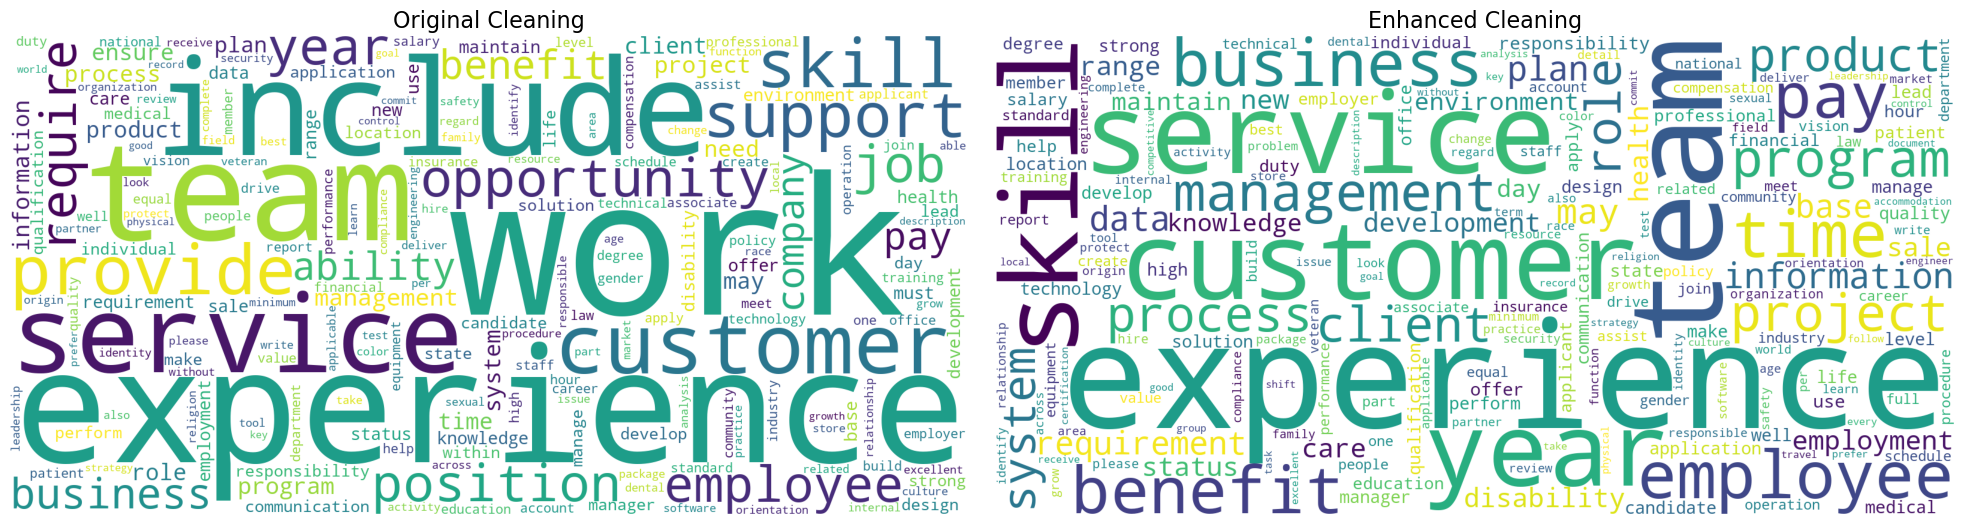

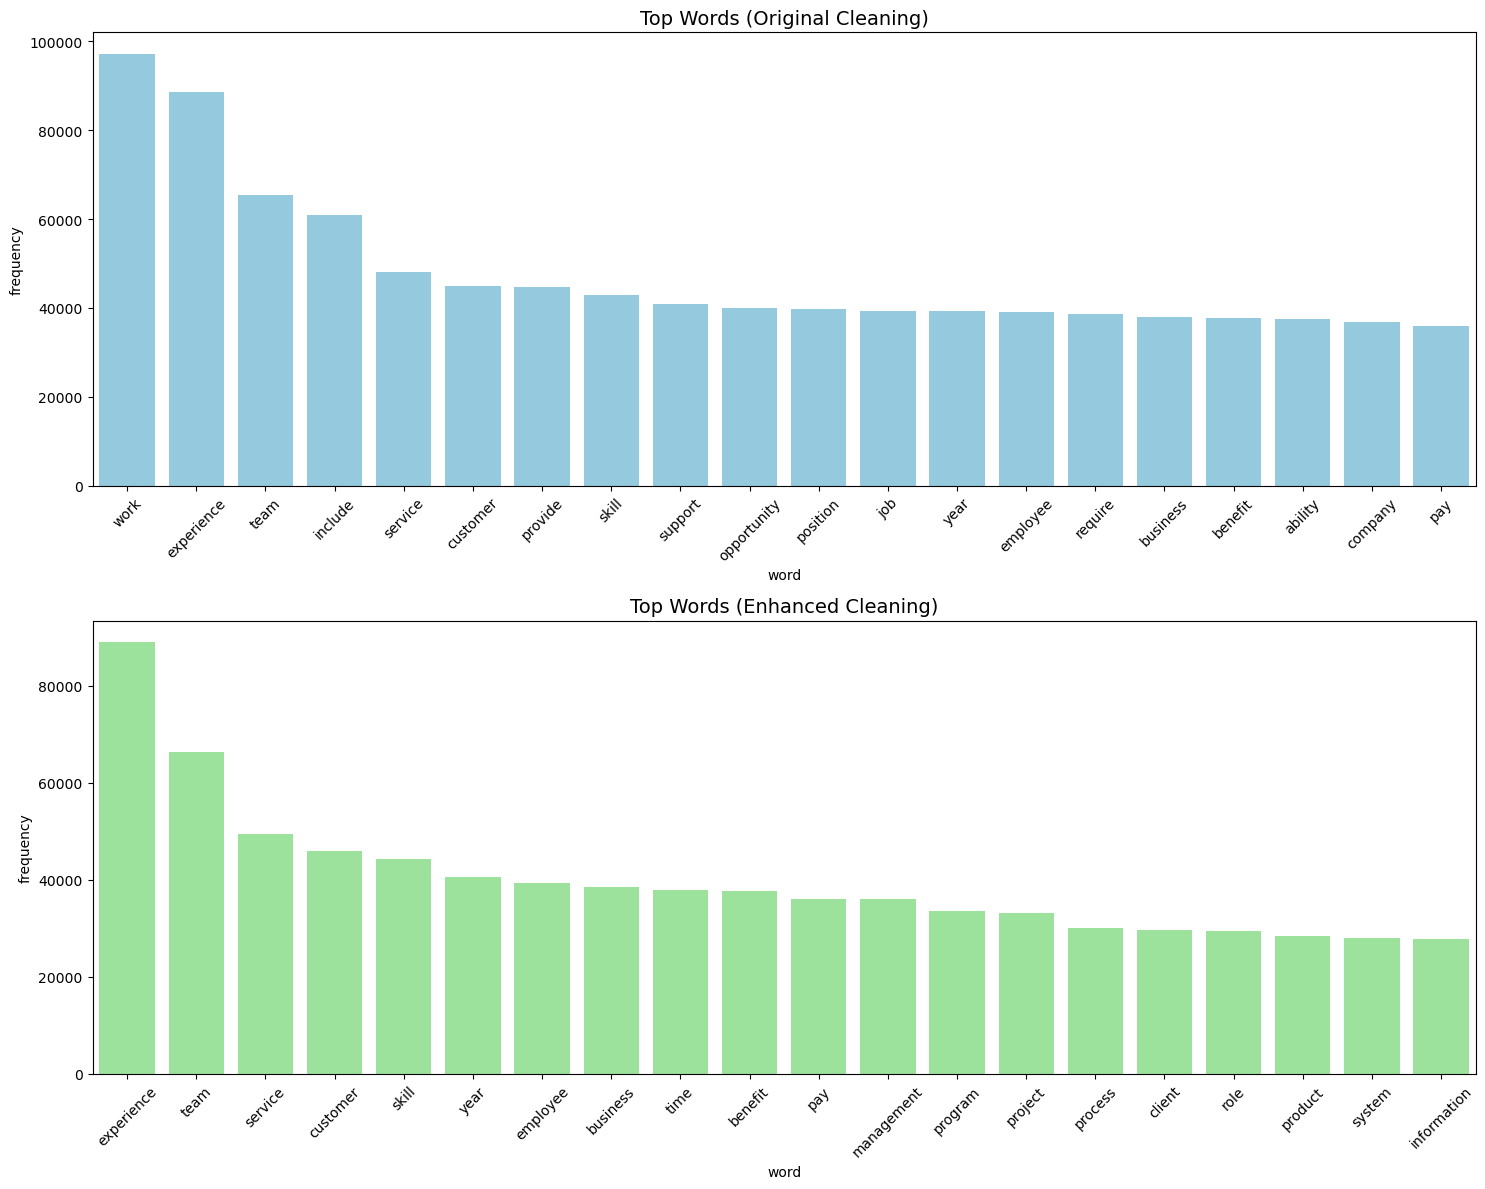

In [205]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import math

def calculate_word_frequencies(df, text_columns, prefix=''):
    """
    Calculate word frequencies across all documents
    """
    # Combine all text for overall frequency
    all_words = []
    document_words = []  # Keep track of words per document for IDF
    
    for _, row in df.iterrows():
        # Combine specified columns for this document
        doc_text = ' '.join(str(row[col]) for col in text_columns)
        words = doc_text.split()
        all_words.extend(words)
        document_words.append(set(words))  # Unique words per document
    
    # Calculate overall word frequencies
    word_freq = Counter(all_words)
    
    # Calculate IDF
    num_docs = len(df)
    word_idf = {}
    for word in set(all_words):
        # Count documents containing the word
        doc_count = sum(1 for doc_words in document_words if word in doc_words)
        idf = math.log(num_docs / (1 + doc_count))
        word_idf[word] = idf
    
    # Create DataFrames
    freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
    freq_df.index.name = 'word'
    freq_df = freq_df.reset_index()
    freq_df = freq_df.sort_values('frequency', ascending=False)
    
    idf_df = pd.DataFrame.from_dict(word_idf, orient='index', columns=['idf'])
    idf_df.index.name = 'word'
    idf_df = idf_df.reset_index()
    idf_df = idf_df.sort_values('idf', ascending=False)
    
    return freq_df, idf_df, word_freq

def plot_comparison_wordclouds(original_freq, enhanced_freq):
    """
    Create side-by-side wordclouds for comparison
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Original wordcloud
    wordcloud1 = WordCloud(
        width=1600, height=800, background_color='white',
        min_font_size=10, max_words=200
    ).generate_from_frequencies(original_freq)
    
    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Original Cleaning', fontsize=16)
    
    # Enhanced wordcloud
    wordcloud2 = WordCloud(
        width=1600, height=800, background_color='white',
        min_font_size=10, max_words=200
    ).generate_from_frequencies(enhanced_freq)
    
    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Enhanced Cleaning', fontsize=16)
    
    plt.tight_layout(pad=2)
    return fig

def plot_comparison_frequencies(orig_freq_df, enh_freq_df, top_n=20):
    """
    Create comparison bar plot of top words
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Original frequencies
    data1 = orig_freq_df.head(top_n)
    sns.barplot(data=data1, x='word', y='frequency', ax=ax1, color='skyblue')
    ax1.set_title('Top Words (Original Cleaning)', fontsize=14)
    ax1.tick_params(axis='x', rotation=45)
    
    # Enhanced frequencies
    data2 = enh_freq_df.head(top_n)
    sns.barplot(data=data2, x='word', y='frequency', ax=ax2, color='lightgreen')
    ax2.set_title('Top Words (Enhanced Cleaning)', fontsize=14)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig

def analyze_and_compare(df):
    """
    Analyze and compare original vs enhanced cleaning
    """
    # Original cleaning analysis
    orig_freq_df, orig_idf_df, orig_word_freq = calculate_word_frequencies(
        df, ['cleaned_title', 'cleaned_description'], 'original_'
    )
    
    # Enhanced cleaning analysis
    enh_freq_df, enh_idf_df, enh_word_freq = calculate_word_frequencies(
        df, ['new_cleaned_title', 'new_cleaned_description'], 'enhanced_'
    )
    
    # Print comparison statistics
    print("\nComparison Statistics:")
    print("-" * 50)
    print(f"Original Cleaning:")
    print(f"Total unique words: {len(orig_freq_df)}")
    print(f"Words appearing only once: {len(orig_freq_df[orig_freq_df['frequency'] == 1])}")
    print(f"\nEnhanced Cleaning:")
    print(f"Total unique words: {len(enh_freq_df)}")
    print(f"Words appearing only once: {len(enh_freq_df[enh_freq_df['frequency'] == 1])}")
    
    # Create and save visualizations
    print("\nCreating comparison visualizations...")
    
    # Word clouds comparison
    cloud_fig = plot_comparison_wordclouds(
        dict(zip(orig_freq_df['word'], orig_freq_df['frequency'])),
        dict(zip(enh_freq_df['word'], enh_freq_df['frequency']))
    )
    cloud_fig.savefig('wordcloud_comparison.png', bbox_inches='tight', dpi=300)
    
    # Frequency plots comparison
    freq_fig = plot_comparison_frequencies(orig_freq_df, enh_freq_df)
    freq_fig.savefig('frequency_comparison.png', bbox_inches='tight', dpi=300)
    
    # Create combined TF-IDF analysis for both
    orig_combined = pd.merge(orig_freq_df, orig_idf_df, on='word')
    orig_combined['tfidf'] = orig_combined['frequency'] * orig_combined['idf']
    orig_combined = orig_combined.sort_values('tfidf', ascending=False)
    
    enh_combined = pd.merge(enh_freq_df, enh_idf_df, on='word')
    enh_combined['tfidf'] = enh_combined['frequency'] * enh_combined['idf']
    enh_combined = enh_combined.sort_values('tfidf', ascending=False)
    
    print("\nTop 20 Words by TF-IDF Score (Original Cleaning):")
    print(orig_combined.head(20))
    print("\nTop 20 Words by TF-IDF Score (Enhanced Cleaning):")
    print(enh_combined.head(20))
    
    # Save detailed results
    orig_combined.to_csv('original_tfidf_analysis.csv', index=False)
    enh_combined.to_csv('enhanced_tfidf_analysis.csv', index=False)
    
    return orig_combined, enh_combined

def main():
    # Read the data
    print("Reading job postings data...")
    df = pd.read_csv('enhanced_cleaned_job_postings.csv')
    
    # Perform analysis
    orig_results, enh_results = analyze_and_compare(df)
    
    print("\nAnalysis complete! Files saved:")
    print("- wordcloud_comparison.png")
    print("- frequency_comparison.png")
    print("- original_tfidf_analysis.csv")
    print("- enhanced_tfidf_analysis.csv")

if __name__ == "__main__":
    main()

### Word(TF-IDF) Correlation with Salary --> Checking if there is word that does not make sense (possible stopword)

In [206]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def analyze_tfidf_salary_correlation(df, n_terms=50):
    """
    Analyze correlation between high TF-IDF terms and salary
    """
    # Combine title and description
    df['combined_text'] = df['new_cleaned_title'] + ' ' + df['new_cleaned_description']
    
    # Calculate TF-IDF
    tfidf = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf.fit_transform(df['combined_text'])
    
    # Get feature names
    feature_names = tfidf.get_feature_names_out()
    
    # Convert to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    
    # Calculate correlation with salary
    correlations = []
    for column in tfidf_df.columns:
        correlation, _ = spearmanr(tfidf_df[column], df['salary'])
        if not np.isnan(correlation):
            correlations.append((column, correlation))
    
    # Sort by absolute correlation
    correlations_df = pd.DataFrame(correlations, columns=['term', 'correlation'])
    correlations_df['abs_correlation'] = correlations_df['correlation'].abs()
    correlations_df = correlations_df.sort_values('abs_correlation', ascending=False)
    
    # Plot top correlations
    plt.figure(figsize=(12, 6))
    top_terms = correlations_df.head(n_terms)
    
    plt.bar(range(len(top_terms)), top_terms['correlation'])
    plt.xticks(range(len(top_terms)), top_terms['term'], rotation=45, ha='right')
    plt.title('Top Terms Correlation with Salary')
    plt.tight_layout()
    plt.savefig('tfidf_salary_correlation.png')
    plt.close()
    
    # Calculate average salary for jobs with/without top terms
    salary_analysis = []
    for term in top_terms['term'][:20]:  # Analyze top 20 terms
        # Jobs with the term
        jobs_with_term = df[df['combined_text'].str.contains(term, regex=False)]
        avg_salary_with = jobs_with_term['salary'].mean()
        
        # Jobs without the term
        jobs_without_term = df[~df['combined_text'].str.contains(term, regex=False)]
        avg_salary_without = jobs_without_term['salary'].mean()
        
        salary_analysis.append({
            'term': term,
            'correlation': correlations_df[correlations_df['term'] == term]['correlation'].iloc[0],
            'avg_salary_with': avg_salary_with,
            'avg_salary_without': avg_salary_without,
            'salary_difference': avg_salary_with - avg_salary_without,
            'count_with': len(jobs_with_term),
            'count_without': len(jobs_without_term)
        })
    
    salary_analysis_df = pd.DataFrame(salary_analysis)
    
    return correlations_df, salary_analysis_df

def main():
    # Perform analysis
    print("\nAnalyzing TF-IDF and salary correlations...")
    df = pd.read_csv('enhanced_cleaned_job_postings.csv')
    df = df.dropna(subset=['new_cleaned_title'])
    correlations_df, salary_analysis_df = analyze_tfidf_salary_correlation(df)

    
    # Print results
    print("\nTop 20 Terms by Correlation with Salary:")
    print("-" * 50)
    print(correlations_df.head(20))
    
    print("\nDetailed Salary Analysis for Top Terms:")
    print("-" * 50)
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print(salary_analysis_df.sort_values('salary_difference', ascending=False))

if __name__ == "__main__":
    main()


Analyzing TF-IDF and salary correlations...

Top 20 Terms by Correlation with Salary:
--------------------------------------------------
            term  correlation  abs_correlation
255      diploma        -0.37             0.37
818       school        -0.35             0.35
514         lift        -0.33             0.33
243       design         0.32             0.32
307  engineering         0.31             0.31
248      develop         0.31             0.31
713      project         0.30             0.30
831       senior         0.30             0.30
306     engineer         0.29             0.29
432         hour        -0.29             0.29
878    strategic         0.28             0.28
250  development         0.28             0.28
867  stakeholder         0.28             0.28
137        clean        -0.27             0.27
906    technical         0.27             0.27
390   functional         0.26             0.26
276         duty        -0.26             0.26
877        store

### **After enhanced cleaning we can see that the top words all have resonable relationship with salary (Techincal jobs related with higher salary, basic labour job related with lower salary)**
---

In [207]:
file_path = "/Users/jaeyoonlee/Desktop/enhanced_cleaned_job_postings.csv"
df = pd.read_csv(file_path)
df.head()

,title,description,new_cleaned_title,new_cleaned_description,salary,work_type,location,industry,experience_level,cleaned_title,cleaned_description,company
0,"Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...",validation engineer labware lims,validation engineer labware limsfoster city va...,135200.00,CONTRACT,"Foster City, CA",IT Services and IT Consulting,Mid-Senior level,validation engineer labware lims,validation engineer labware limsfoster city va...,"I.T. Solutions, Inc."
1,Administrative Assistant - CONCUR,Global Financial Services firm is seeking an e...,administrative assistant concur,global financial service firm seek experienced...,82500.00,FULL_TIME,"New York, NY",Information Services,Associate,administrative assistant concur,global financial service firm seek experienced...,ActOne Group
2,Customer Service Representative,We are seeking future agents to join our team!...,customer service representative,seek future agent join team look driven self m...,90000.00,FULL_TIME,"Greater Orlando, FL",Insurance,Entry level,customer service representative,seek future agent join team look driven self-m...,ABC Farigua Division
3,Inbound Call Center Specialist,"Always Connecting, Always Evolving.\nIf you ar...",inbound call center specialist,always connect always evolve look new look fit...,38480.00,CONTRACT,"Richmond, VA",Staffing and Recruiting,Associate,inbound call center specialist,always connect always evolve look new opportun...,TECHEAD
4,Tool and Die Maker,Job Summary:The Tool and Die Maker will build ...,tool die maker,summary tool die maker build dy concept strip ...,69680.00,FULL_TIME,Cincinnati Metropolitan Area,Staffing and Recruiting,Associate,tool die maker,job summary tool die maker build dy concept st...,Prolink


In [208]:
df = df.dropna(subset=['new_cleaned_title'])
missing_values = df.isnull().sum()
print(missing_values)

title                      0
description                0
new_cleaned_title          0
new_cleaned_description    0
salary                     0
work_type                  0
location                   0
industry                   0
experience_level           0
cleaned_title              0
cleaned_description        0
company                    0
dtype: int64


## BERT + Deep Learning

In [33]:
class EnhancedJobDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=256):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length
        
        # Create encoders for categorical variables
        self.work_type_encoder = LabelEncoder().fit(df['work_type'].fillna('UNKNOWN'))
        self.company_encoder = LabelEncoder().fit(df['company'].fillna('UNKNOWN'))
        self.industry_encoder = LabelEncoder().fit(df['industry'].fillna('UNKNOWN'))
        
        # Store number of unique values for embedding layers
        self.num_work_types = len(self.work_type_encoder.classes_)
        self.num_companies = len(self.company_encoder.classes_)
        self.num_industries = len(self.industry_encoder.classes_)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # Combine cleaned title and description
        full_text = f"{row['cleaned_title']} {row['cleaned_description']}"
        
        # Encode categorical variables
        work_type = self.work_type_encoder.transform([row['work_type']])[0]
        company = self.company_encoder.transform([row['company']])[0]
        industry = self.industry_encoder.transform([row['industry']])[0]

        encoding = self.tokenizer.encode_plus(
            full_text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'work_type': torch.tensor(work_type, dtype=torch.long),
            'company': torch.tensor(company, dtype=torch.long),
            'industry': torch.tensor(industry, dtype=torch.long),
            'salary': torch.tensor(row['salary'], dtype=torch.float)
        }

class EnhancedSalaryPredictor(nn.Module):
    def __init__(self, bert_model, num_work_types, num_companies, num_industries):
        super(EnhancedSalaryPredictor, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        
        # Embeddings for categorical variables
        self.work_type_embedding = nn.Embedding(num_work_types, 8)
        self.company_embedding = nn.Embedding(num_companies, 16)
        self.industry_embedding = nn.Embedding(num_industries, 16)
        
        # Process BERT output
        self.bert_fc = nn.Linear(768, 256)
        
        # Process categorical features
        self.categorical_fc = nn.Linear(40, 64)  # 8 + 16 + 16 = 40
        
        # Combined features
        self.regressor = nn.Sequential(
            nn.Linear(320, 128),  # 256 from BERT + 64 from categorical
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, input_ids, attention_mask, work_type, company, industry):
        # Process text through BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[0][:, 0, :]
        bert_features = self.bert_fc(self.dropout(pooled_output))
        
        # Get embeddings for categorical variables
        work_type_emb = self.work_type_embedding(work_type)
        company_emb = self.company_embedding(company)
        industry_emb = self.industry_embedding(industry)
        
        # Combine categorical embeddings
        categorical_features = torch.cat([work_type_emb, company_emb, industry_emb], dim=1)
        categorical_output = self.categorical_fc(categorical_features)
        
        # Combine all features
        combined = torch.cat([bert_features, categorical_output], dim=1)
        return self.regressor(combined)

class BERTSalaryPredictor:
    def __init__(self, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.device = device
        print(f"Using device: {self.device}")
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.model = None
        self.training_history = {'train_loss': [], 'val_loss': []}
        self.salary_scaler = StandardScaler()

    def prepare_data(self, df, sample_size=None):
        if sample_size:
            df = df.sample(n=min(sample_size, len(df)), random_state=42)
        
        # Clean and prepare data
        df = df.dropna(subset=['salary'])
        df['salary'] = self.salary_scaler.fit_transform(df[['salary']])
        
        # Create dataset
        dataset = EnhancedJobDataset(df, self.tokenizer)
        
        # Split data
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_dataset, val_dataset = torch.utils.data.random_split(
            dataset, [train_size, val_size]
        )
        
        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=16)
        
        return train_loader, val_loader, dataset

    def train(self, train_loader, dataset, val_loader, epochs=5):
        self.model = EnhancedSalaryPredictor(
            self.bert_model,
            dataset.num_work_types,
            dataset.num_companies,
            dataset.num_industries
        ).to(self.device)
        
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=2e-5)
        criterion = nn.MSELoss()
        
        best_val_loss = float('inf')
        
        for epoch in range(epochs):
            # Training
            self.model.train()
            train_loss = 0
            train_batches = 0
            
            for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                work_type = batch['work_type'].to(self.device)
                company = batch['company'].to(self.device)
                industry = batch['industry'].to(self.device)
                salaries = batch['salary'].to(self.device)
                
                optimizer.zero_grad()
                outputs = self.model(
                    input_ids, attention_mask, work_type, company, industry
                )
                loss = criterion(outputs.squeeze(), salaries)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                train_batches += 1
            
            avg_train_loss = train_loss / train_batches
            self.training_history['train_loss'].append(avg_train_loss)
            
            # Validation
            self.model.eval()
            val_loss = 0
            val_batches = 0
            
            with torch.no_grad():
                for batch in val_loader:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    work_type = batch['work_type'].to(self.device)
                    company = batch['company'].to(self.device)
                    industry = batch['industry'].to(self.device)
                    salaries = batch['salary'].to(self.device)
                    
                    outputs = self.model(
                        input_ids, attention_mask, work_type, company, industry
                    )
                    loss = criterion(outputs.squeeze(), salaries)
                    
                    val_loss += loss.item()
                    val_batches += 1
            
            avg_val_loss = val_loss / val_batches
            self.training_history['val_loss'].append(avg_val_loss)
            
            print(f'Epoch {epoch + 1}:')
            print(f'Average training loss: {avg_train_loss:.4f}')
            print(f'Average validation loss: {avg_val_loss:.4f}')
            
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(self.model.state_dict(), 'best_salary_predictor.pth')

def run_salary_prediction(df):
    # Initialize predictor
    predictor = BERTSalaryPredictor()
    
    # Prepare data
    train_loader, val_loader, dataset = predictor.prepare_data(df)
    
    # Train model
    print("Training model...")
    predictor.train(train_loader, dataset, val_loader)
    
    # Evaluate model
    print("\nEvaluating model...")
    results = predictor.evaluate(val_loader)
    
    # Print and plot results
    print("\nModel Performance Metrics:")
    print(f"RMSE: ${results['RMSE']:,.2f}")
    print(f"MAE: ${results['MAE']:,.2f}")
    print(f"R2 Score: {results['R2']:.4f}")
    
    predictor.plot_training_history()
    
    return results

# Usage
if __name__ == "__main__":
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd
    
    # Load your data
    df = pd.read_csv('/Users/jaeyoonlee/Desktop/cleaned_job_postings.csv')
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    
    # Run prediction
    results = run_salary_prediction(df)

Using device: cpu
Training model...


Epoch 1/5: 100%|██████████| 1205/1205 [1:45:10<00:00,  5.24s/it]


Epoch 1:
Average training loss: 0.4050
Average validation loss: 0.3130


Epoch 2/5: 100%|██████████| 1205/1205 [1:42:23<00:00,  5.10s/it]


Epoch 2:
Average training loss: 0.2529
Average validation loss: 0.2634


Epoch 3/5: 100%|██████████| 1205/1205 [1:43:19<00:00,  5.14s/it]


Epoch 3:
Average training loss: 0.1832
Average validation loss: 0.2452


Epoch 4/5: 100%|██████████| 1205/1205 [1:44:09<00:00,  5.19s/it]


Epoch 4:
Average training loss: 0.1307
Average validation loss: 0.2774


Epoch 5/5: 100%|██████████| 1205/1205 [1:43:08<00:00,  5.14s/it]


Epoch 5:
Average training loss: 0.0975
Average validation loss: 0.2530

Evaluating model...


AttributeError: 'BERTSalaryPredictor' object has no attribute 'evaluate'

### Visualize BERT result

Using device: cpu


/var/folders/p4/78tsv97n1x17vnr6ql85fmqh0000gn/T/ipykernel_13759/1685662351.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load('best_


Model Performance Metrics:
RMSE: $15,510.12
MAE: $11,085.89
R2 Score: 0.8678


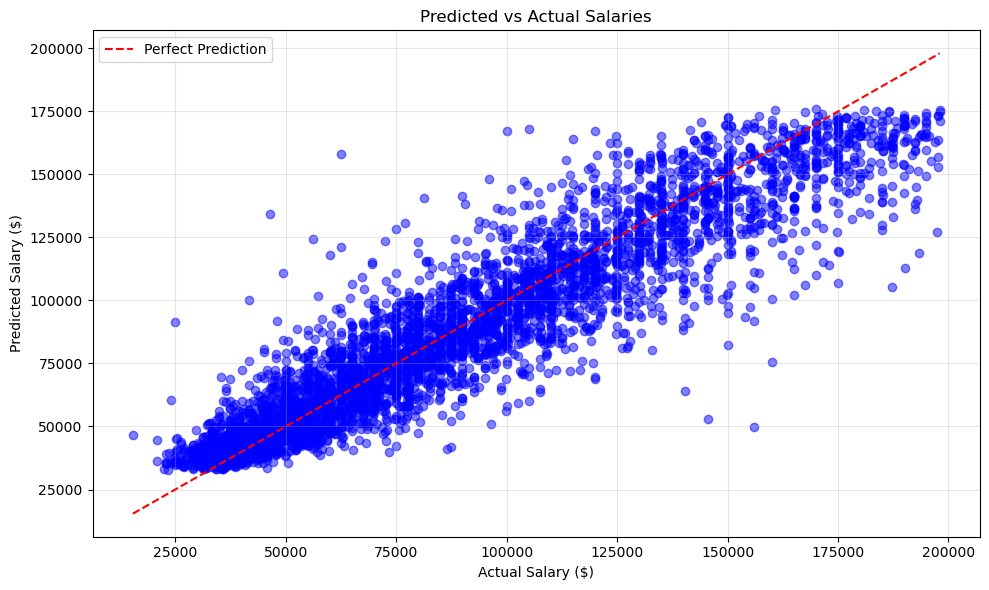

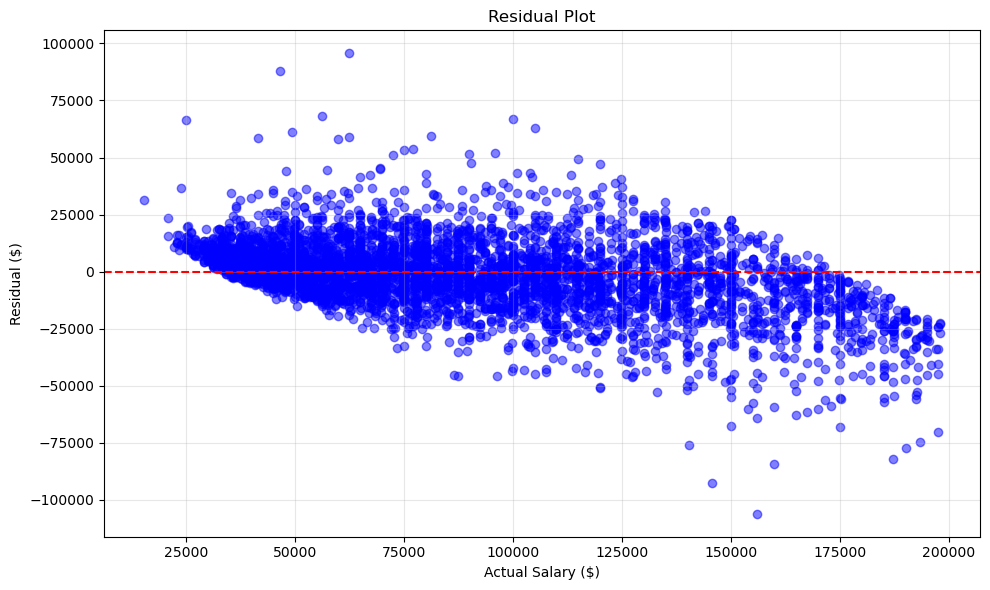

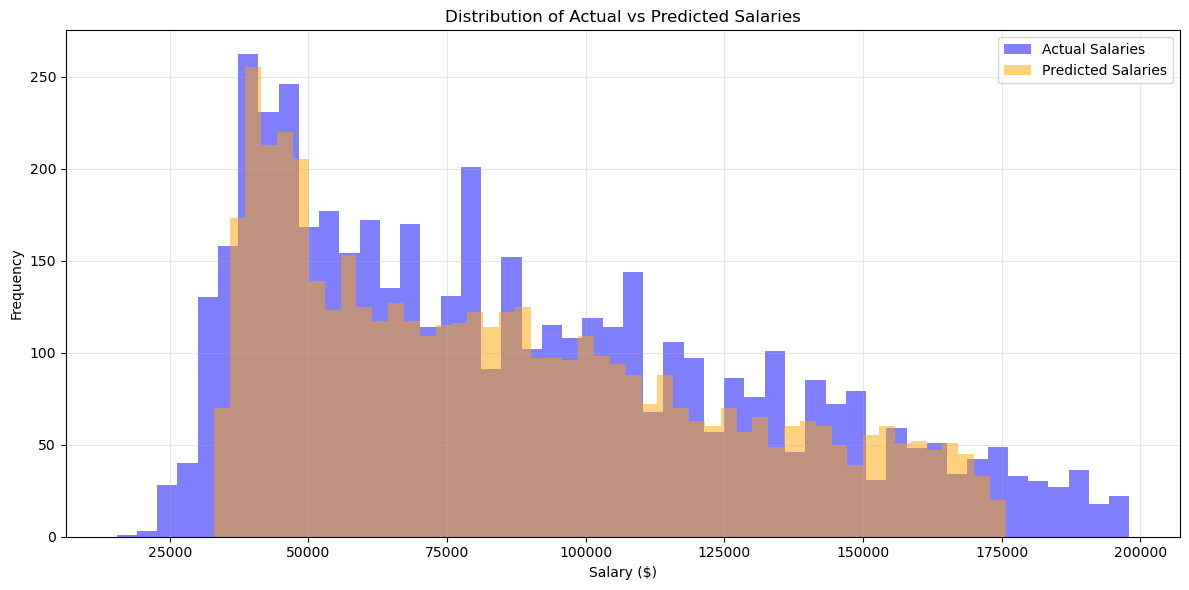


Residual Statistics:
Mean Residual: $-1,474.93
Std Residual: $15,439.83
Max Overprediction: $95,658.88
Max Underprediction: $-106,131.18


In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Your existing code
predictor = BERTSalaryPredictor()
result = predictor.prepare_data(df)
val_loader, dataset = result if len(result) == 2 else (result[1], result[2])
results = predictor.evaluate(val_loader)

# Print metrics
print("\nModel Performance Metrics:")
print(f"RMSE: ${results['RMSE']:,.2f}")
print(f"MAE: ${results['MAE']:,.2f}")
print(f"R2 Score: {results['R2']:.4f}")

# Set a basic style with grid
plt.style.use('default')

# 1. Scatter plot of predicted vs actual salaries
plt.figure(figsize=(10, 6))
plt.grid(True, alpha=0.3)
plt.scatter(results['actuals'], results['predictions'], alpha=0.5, color='blue')

# Add perfect prediction line
max_val = max(max(results['actuals']), max(results['predictions']))
min_val = min(min(results['actuals']), min(results['predictions']))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Salary ($)')
plt.ylabel('Predicted Salary ($)')
plt.title('Predicted vs Actual Salaries')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual plot
residuals = np.array(results['predictions']) - np.array(results['actuals'])
plt.figure(figsize=(10, 6))
plt.grid(True, alpha=0.3)
plt.scatter(results['actuals'], residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Salary ($)')
plt.ylabel('Residual ($)')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# 3. Distribution plot
plt.figure(figsize=(12, 6))
plt.grid(True, alpha=0.3)
plt.hist(results['actuals'], bins=50, alpha=0.5, label='Actual Salaries', color='blue')
plt.hist(results['predictions'], bins=50, alpha=0.5, label='Predicted Salaries', color='orange')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Salaries')
plt.legend()
plt.tight_layout()
plt.show()

# Print additional statistics
print("\nResidual Statistics:")
print(f"Mean Residual: ${np.mean(residuals):,.2f}")
print(f"Std Residual: ${np.std(residuals):,.2f}")
print(f"Max Overprediction: ${np.max(residuals):,.2f}")
print(f"Max Underprediction: ${np.min(residuals):,.2f}")

### Improved TF-IDF with Random Forest (Enhanced Data Cleaning)
#### Used already tunned hyper-parameter for TF-IDF from previous testing

In [68]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

class SkillCategoryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, skill_categories):
        self.skill_categories = skill_categories
        
    def has_skill_category(self, text, category):
        if not isinstance(text, str):
            return False
        text = text.lower()
        skill_info = self.skill_categories[category]
        # For each keyword, check if it exists in the text
        return any(keyword.lower() in text for keyword in skill_info['keywords'])
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        features = np.zeros((len(X), len(self.skill_categories)))
        for i, text in enumerate(X):
            for j, category in enumerate(self.skill_categories.keys()):
                features[i, j] = self.has_skill_category(text, category)
        return features

class JobTextAnalysis:
    def __init__(self, df):
        """Initialize with the DataFrame"""
        self.df = df
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.stop_words.update([
            'experience', 'job', 'work', 'company', 'position', 'candidate',
            'required', 'requirements', 'qualified', 'ability', 'skills',
            'responsibilities', 'duties', 'role', 'team', 'years'
        ])
        self.pipeline = None
        
        # Updated skill categories from paste-2.txt
        self.skill_categories = {
            'Creative Arts': {
                'keywords': [
                    'adobe creative suite', 'photoshop', 'illustrator', 'indesign',
                    'graphic design', 'visual design', 'typography', 'art direction',
                    'creative direction', 'brand design', 'illustration', 'adobe xd',
                    'figma', 'sketch', 'color theory', 'layout design', '3d modeling',
                    'motion graphics', 'animation', 'concept art', 'storyboarding',
                    'video production', 'print design', 'logo design', 'digital illustration',
                    'mixed media', 'adobe certified expert', 'adobe certified professional'
                ]
            },
            'Digital Design': {
                'keywords': [
                    'ui design', 'ux design', 'user interface', 'user experience',
                    'wireframing', 'prototyping', 'responsive design', 'mobile design',
                    'web design', 'interaction design', 'usability testing',
                    'information architecture', 'figma', 'sketch', 'mobile app design',
                    'app interface', 'design thinking', 'prototype', 'user research',
                    'design systems', 'style guides', 'invision', 'axure', 'user flows',
                    'user journey mapping', 'a/b testing', 'google mobile certification'
                ]
            },
            'Software Development': {
                'keywords': [
                    'java', 'python', 'javascript', 'react', 'angular', 'node.js',
                    'full stack', 'front end', 'back end', 'web development',
                    'api development', 'cloud computing', 'aws', 'azure', 'devops',
                    'ci/cd', 'docker', 'kubernetes', 'c++', 'c#', 'php', 'ruby',
                    'swift', 'objective-c', 'typescript', 'django', 'flask',
                    'spring boot', 'react native', 'mobile development', 'oop',
                    'object oriented programming', 'graphql', 'microservices',
                    'unit testing', 'test driven development', 'git', 'version control',
                    'rest api', 'restful api', 'continuous integration',
                    'aws solutions architect', 'aws certified developer',
                    'certified kubernetes administrator', 'microsoft azure developer',
                    'oracle certified java', 'google android developer'
                ]
            },
            'Marketing': {
                'keywords': [
                    'digital marketing', 'content marketing', 'seo', 'sem',
                    'social media marketing', 'email marketing', 'marketing automation',
                    'google analytics', 'conversion optimization', 'brand marketing',
                    'marketing strategy', 'campaign management', 'hubspot', 'marketo',
                    'influencer marketing', 'content strategy', 'market segmentation',
                    'growth hacking', 'customer acquisition', 'ppc', 'affiliate marketing',
                    'e-commerce marketing', 'paid media', 'copywriting', 'public relations',
                    'advertising', 'media planning', 'inbound marketing', 'outbound marketing',
                    'customer journey mapping', 'google ads certification',
                    'facebook blueprint', 'hubspot inbound certification',
                    'hootsuite certification'
                ]
            },
            'Project Management': {
                'keywords': [
                    'project management', 'agile methodology', 'scrum master',
                    'project planning', 'risk management', 'stakeholder management',
                    'project coordination', 'jira', 'asana', 'microsoft project',
                    'project lifecycle', 'change management', 'kanban', 'waterfall',
                    'resource allocation', 'project scheduling', 'budgeting',
                    'project estimation', 'risk analysis', 'project documentation',
                    'portfolio management', 'quality assurance', 'pmp',
                    'certified scrum master', 'prince2', 'pmi-acp'
                ]
            },
            'Product Management': {
                'keywords': [
                    'product strategy', 'product roadmap', 'product development',
                    'product lifecycle', 'agile product', 'product owner', 'scrum',
                    'market research', 'user stories', 'feature prioritization',
                    'product metrics', 'product analytics', 'product launch',
                    'product vision', 'product backlog', 'go-to-market',
                    'customer insight', 'product discovery', 'product iteration',
                    'competitive analysis', 'customer research', 'mvp definition',
                    'user feedback', 'pricing strategy', 'scrum product owner',
                    'certified product manager'
                ]
            },
            'Data Analysis': {
                'keywords': [
                    'data analysis', 'statistical analysis', 'data visualization',
                    'sql', 'python', 'r programming', 'tableau', 'power bi',
                    'excel advanced', 'data modeling', 'regression analysis',
                    'hypothesis testing', 'a/b testing', 'data mining',
                    'machine learning', 'predictive modeling', 'data wrangling',
                    'data cleaning', 'etl', 'pandas', 'numpy', 'big data',
                    'data science', 'data reporting', 'data preprocessing',
                    'data storytelling', 'clustering', 'forecasting',
                    'statistical programming', 'spss', 'sas',
                    'google data analytics', 'microsoft data analyst',
                    'certified analytics professional'
                ]
            },
            'Business Analysis': {
                'keywords': [
                    'business analysis', 'requirements gathering', 'process mapping',
                    'gap analysis', 'business process', 'system analysis',
                    'functional requirements', 'business intelligence', 'data modeling',
                    'process improvement', 'workflow optimization',
                    'business requirements', 'cost-benefit analysis', 'business case',
                    'stakeholder analysis', 'process reengineering',
                    'business process modeling', 'use case analysis',
                    'root cause analysis', 'benchmarking', 'cbap', 'ccba', 'pmi-pba'
                ]
            },
            'Financial': {
                'keywords': [
                    'financial analysis', 'financial modeling', 'forecasting',
                    'budgeting', 'variance analysis', 'cost analysis', 'pricing',
                    'profit and loss', 'balance sheet', 'financial reporting',
                    'risk assessment', 'investment analysis', 'accounting',
                    'financial planning', 'capital budgeting', 'risk management',
                    'valuation', 'due diligence', 'cash flow analysis',
                    'treasury management', 'audit', 'compliance', 'tax accounting',
                    'forensic accounting', 'mergers and acquisitions',
                    'asset management', 'portfolio management', 'cfa', 'cpa',
                    'financial risk manager', 'chartered financial analyst'
                ]
            },
            'Sales': {
                'keywords': [
                    'sales strategy', 'account management', 'sales forecasting',
                    'crm', 'salesforce', 'sales operations', 'business development',
                    'lead generation', 'pipeline management', 'contract negotiation',
                    'sales analytics', 'territory management', 'lead qualification',
                    'client relationship', 'b2b sales', 'b2c sales', 'negotiation',
                    'sales presentations', 'sales closing', 'upselling',
                    'cross selling', 'cold calling', 'sales funnel',
                    'customer acquisition', 'sales conversion',
                    'account based marketing', 'sales enablement',
                    'customer retention', 'relationship management',
                    'certified sales professional', 'salesforce certified',
                    'salesforce certified administrator',
                    'salesforce cloud consultant', 'inside sales professional'
                ]
            }
        }

    def clean_text(self, text):
        """Clean and preprocess text"""
        if not isinstance(text, str):
            return ""
        
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens 
                 if token not in self.stop_words and len(token) > 2]
        return ' '.join(tokens)

    def prepare_data(self):
        """Prepare data for model training"""
        X = self.df['new_cleaned_description'].astype(str).apply(self.clean_text)
        y = self.df['salary'].values
        return X, y

    def create_pipeline(self):
        """Create pipeline with TF-IDF and skill categories"""
        features = FeatureUnion([
            ('tfidf', TfidfVectorizer(
                min_df=0.01,
                max_df=0.9,
                ngram_range=(1,3),
                stop_words=list(self.stop_words),
                analyzer='word'
            )),
            ('skills', SkillCategoryTransformer(self.skill_categories))
        ])
        
        return Pipeline([
            ('features', features),
            ('rf', RandomForestRegressor(
                n_estimators=100,
                max_depth=None,
                min_samples_split=2,
                min_samples_leaf=1,
                random_state=42
            ))
        ])

    def train_model(self, test_size=0.2):
        """Train the model"""
        print("Preparing data...")
        X, y = self.prepare_data()
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
        
        print("Training model...")
        self.pipeline = self.create_pipeline()
        self.pipeline.fit(X_train, y_train)
        
        train_pred = self.pipeline.predict(X_train)
        test_pred = self.pipeline.predict(X_test)
        
        metrics = {
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred)),
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred)
        }
        
        print("\nModel Performance:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
        
        return metrics

    def predict_salary(self, job_description):
        """Predict salary for a new job description"""
        if self.pipeline is None:
            raise ValueError("Model hasn't been trained yet. Please run training first.")
        
        cleaned_desc = self.clean_text(job_description)
        predicted_salary = self.pipeline.predict([cleaned_desc])[0]
        return predicted_salary

    def save_model(self, filename='salary_predictor.joblib'):
        """Save the trained model"""
        if self.pipeline is None:
            raise ValueError("Model hasn't been trained yet. Please train before saving.")
        joblib.dump(self.pipeline, filename)

    def load_model(self, filename='salary_predictor.joblib'):
        """Load a trained model"""
        self.pipeline = joblib.load(filename)

# Initialize with your DataFrame

new_data = pd.read_csv("/Users/jaeyoonlee/Desktop/enhanced_cleaned_job_postings.csv")
analysis = JobTextAnalysis(new_data)

# Train the model
metrics = analysis.train_model()

Preparing data...
Training model...

Model Performance:
train_rmse: 9578.6592
test_rmse: 24822.1831
train_r2: 0.9493
test_r2: 0.6591


### Note: Using enhanced preprocessing data, for the same model, the performance increased from 0.623 to 0.659, but still struggling with overfitting
---

# **BEST MODEL: R square 0.8292** 
### Improved from 0.7323
### New BoW(Encoding) + TF-IDF + Neural Network (Enhanced Cleaning)

Using device: cpu
Tuning skill-specific TF-IDF parameters...


Testing skill TF-IDF parameters:   4%|▎         | 1/27 [00:03<01:28,  3.42s/it]


New best skill parameters found:
Parameters: {'ngram_range': (1, 1), 'min_df': 0.005, 'max_df': 0.8}
Features: 300
Sparsity: 0.9967
Average Frequency: 51.6498
Score: 51.7484


Testing skill TF-IDF parameters:  37%|███▋      | 10/27 [00:36<01:12,  4.29s/it]


New best skill parameters found:
Parameters: {'ngram_range': (1, 2), 'min_df': 0.005, 'max_df': 0.8}
Features: 300
Sparsity: 0.9939
Average Frequency: 74.9454
Score: 137.5093


Testing skill TF-IDF parameters:  70%|███████   | 19/27 [01:37<00:58,  7.26s/it]


New best skill parameters found:
Parameters: {'ngram_range': (1, 3), 'min_df': 0.005, 'max_df': 0.8}
Features: 300
Sparsity: 0.9938
Average Frequency: 75.4687
Score: 140.0581


Testing skill TF-IDF parameters: 100%|██████████| 27/27 [02:54<00:00,  6.45s/it]



Best Skill TF-IDF Parameters: {'ngram_range': (1, 3), 'min_df': 0.005, 'max_df': 0.8}
Feature Statistics: {'n_features': 300, 'sparsity': 0.9938138537125458, 'avg_frequency': 75.46867048180917, 'max_frequency': 3255.250417997828}
Generating TF-IDF features...
Created 5319 features
Tuning neural network hyperparameters...


Testing NN parameters:  20%|██        | 1/5 [00:21<01:25, 21.50s/it]


New best parameters found:
Parameters: {'hidden_dims': [512, 256, 128, 64], 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}
Validation Loss: 0.3064


Testing NN parameters:  40%|████      | 2/5 [00:30<00:43, 14.37s/it]

Error with parameters {'hidden_dims': [512, 256, 128], 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'batch_size': 16}: iteration over a 0-d array


Testing NN parameters:  60%|██████    | 3/5 [00:45<00:29, 14.61s/it]


New best parameters found:
Parameters: {'hidden_dims': [512, 256, 128], 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 64}
Validation Loss: 0.2915


Testing NN parameters:  80%|████████  | 4/5 [00:55<00:12, 12.56s/it]

Error with parameters {'hidden_dims': [256, 256, 128], 'dropout_rate': 0.3, 'learning_rate': 0.0002, 'batch_size': 16}: iteration over a 0-d array


Testing NN parameters: 100%|██████████| 5/5 [01:16<00:00, 15.30s/it]



Best Neural Network Parameters: {'hidden_dims': [512, 256, 128], 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 64}


Epoch 1/20: 100%|██████████| 302/302 [00:02<00:00, 142.71it/s]


Epoch 1:
Average training loss: 0.1715
Average validation loss: 0.1639
RMSE: $17,180.18
MAE: $12,458.69
R2 Score: 0.8354



Epoch 2/20: 100%|██████████| 302/302 [00:02<00:00, 135.78it/s]


Epoch 2:
Average training loss: 0.1213
Average validation loss: 0.1602
RMSE: $16,973.12
MAE: $12,113.09
R2 Score: 0.8394



Epoch 3/20: 100%|██████████| 302/302 [00:02<00:00, 145.13it/s]


Epoch 3:
Average training loss: 0.0959
Average validation loss: 0.1629
RMSE: $17,092.63
MAE: $12,022.89
R2 Score: 0.8371



Epoch 4/20: 100%|██████████| 302/302 [00:02<00:00, 145.32it/s]


Epoch 4:
Average training loss: 0.0881
Average validation loss: 0.1699
RMSE: $17,471.11
MAE: $12,161.22
R2 Score: 0.8298



Epoch 5/20: 100%|██████████| 302/302 [00:02<00:00, 149.55it/s]


Epoch 5:
Average training loss: 0.0777
Average validation loss: 0.1775
RMSE: $17,867.67
MAE: $12,522.56
R2 Score: 0.8220



Epoch 6/20: 100%|██████████| 302/302 [00:02<00:00, 148.02it/s]


Epoch 6:
Average training loss: 0.0711
Average validation loss: 0.1695
RMSE: $17,422.14
MAE: $12,273.49
R2 Score: 0.8307



Epoch 7/20: 100%|██████████| 302/302 [00:02<00:00, 143.60it/s]


Epoch 7:
Average training loss: 0.0606
Average validation loss: 0.1668
RMSE: $17,302.33
MAE: $12,167.57
R2 Score: 0.8331



Epoch 8/20: 100%|██████████| 302/302 [00:02<00:00, 147.89it/s]


Epoch 8:
Average training loss: 0.0529
Average validation loss: 0.1699
RMSE: $17,461.41
MAE: $12,478.51
R2 Score: 0.8300



Epoch 9/20: 100%|██████████| 302/302 [00:02<00:00, 147.47it/s]


Epoch 9:
Average training loss: 0.0498
Average validation loss: 0.1679
RMSE: $17,343.34
MAE: $12,061.66
R2 Score: 0.8323



Epoch 10/20: 100%|██████████| 302/302 [00:02<00:00, 141.45it/s]


Epoch 10:
Average training loss: 0.0470
Average validation loss: 0.1815
RMSE: $18,055.03
MAE: $13,396.76
R2 Score: 0.8182



Epoch 11/20: 100%|██████████| 302/302 [00:02<00:00, 136.24it/s]


Epoch 11:
Average training loss: 0.0444
Average validation loss: 0.1675
RMSE: $17,295.53
MAE: $11,774.61
R2 Score: 0.8332



Epoch 12/20: 100%|██████████| 302/302 [00:02<00:00, 137.16it/s]


Epoch 12:
Average training loss: 0.0411
Average validation loss: 0.1682
RMSE: $17,338.43
MAE: $11,825.02
R2 Score: 0.8324



Epoch 13/20: 100%|██████████| 302/302 [00:02<00:00, 145.76it/s]


Epoch 13:
Average training loss: 0.0412
Average validation loss: 0.1654
RMSE: $17,208.20
MAE: $11,839.15
R2 Score: 0.8349



Epoch 14/20: 100%|██████████| 302/302 [00:02<00:00, 146.65it/s]


Epoch 14:
Average training loss: 0.0428
Average validation loss: 0.1712
RMSE: $17,474.97
MAE: $11,989.82
R2 Score: 0.8297



Epoch 15/20: 100%|██████████| 302/302 [00:02<00:00, 134.25it/s]


Epoch 15:
Average training loss: 0.0381
Average validation loss: 0.1714
RMSE: $17,525.81
MAE: $12,623.72
R2 Score: 0.8287



Epoch 16/20: 100%|██████████| 302/302 [00:02<00:00, 146.93it/s]


Epoch 16:
Average training loss: 0.0428
Average validation loss: 0.1656
RMSE: $17,200.60
MAE: $11,844.24
R2 Score: 0.8350



Epoch 17/20: 100%|██████████| 302/302 [00:02<00:00, 147.74it/s]


Epoch 17:
Average training loss: 0.0389
Average validation loss: 0.1689
RMSE: $17,385.65
MAE: $12,220.92
R2 Score: 0.8315



Epoch 18/20: 100%|██████████| 302/302 [00:02<00:00, 142.84it/s]


Epoch 18:
Average training loss: 0.0402
Average validation loss: 0.1698
RMSE: $17,416.96
MAE: $11,891.99
R2 Score: 0.8308



Epoch 19/20: 100%|██████████| 302/302 [00:02<00:00, 144.43it/s]


Epoch 19:
Average training loss: 0.0364
Average validation loss: 0.1702
RMSE: $17,440.93
MAE: $11,808.60
R2 Score: 0.8304



Epoch 20/20: 100%|██████████| 302/302 [00:02<00:00, 146.85it/s]


Epoch 20:
Average training loss: 0.0389
Average validation loss: 0.1715
RMSE: $17,502.23
MAE: $11,880.91
R2 Score: 0.8292



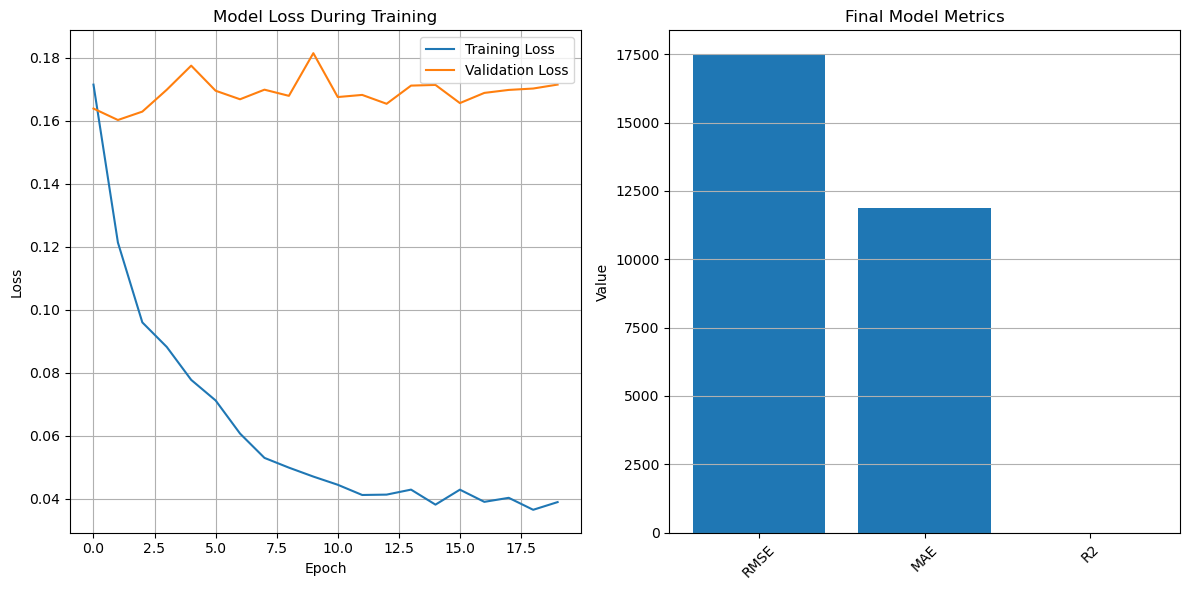

TypeError: SalaryPredictionModel.create_features() missing 1 required positional argument: 'skill_categories'

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from itertools import product
import joblib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

class SalaryDataset(Dataset):
    def __init__(self, features, targets=None):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets) if targets is not None else None

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.targets is not None:
            return self.features[idx], self.targets[idx]
        return self.features[idx]

class SalaryNeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128, 64], dropout_rate=0.1):
        super(SalaryNeuralNet, self).__init__()
        
        layers = []
        prev_dim = input_dim
        
        for dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, dim),
                nn.ReLU(),
                nn.BatchNorm1d(dim),
                nn.Dropout(dropout_rate)
            ])
            prev_dim = dim
        
        # Output layer
        layers.append(nn.Linear(prev_dim, 1))
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x).squeeze()

class SalaryPredictionModel:
    def __init__(self):
        self.general_tfidf = None
        self.skill_tfidf = None
        self.neural_net = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.salary_scaler = StandardScaler()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        
        # Best parameters storage
        self.best_skill_tfidf_params = None
        self.best_nn_params = None

    def prepare_data(self, feature_matrix, target, batch_size=16):
        """Prepare data for training"""
        # Scale features
        X_scaled = self.scaler.fit_transform(feature_matrix)
        y_scaled = self.salary_scaler.fit_transform(target.values.reshape(-1, 1)).ravel()
        
        # Create dataset
        dataset = SalaryDataset(X_scaled, y_scaled)
        
        # Split data
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_dataset, val_dataset = torch.utils.data.random_split(
            dataset, [train_size, val_size]
        )
        
        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)
        
        return train_loader, val_loader

    def create_features(self, df, skill_categories):
        """Create TF-IDF and other features"""
        print("Generating TF-IDF features...")
        combined_text = df['new_cleaned_title'] + ' ' + df['new_cleaned_description']
        
        # General TF-IDF with best parameters
        self.general_tfidf = TfidfVectorizer(
            stop_words="english",
            ngram_range=(1, 3),
            min_df=0.01,
            max_df=0.9
        )
        general_matrix = self.general_tfidf.fit_transform(combined_text)
        general_features = pd.DataFrame(
            general_matrix.toarray(),
            columns=[f'general_{f}' for f in self.general_tfidf.get_feature_names_out()]
        )
        
        # Prepare skill vocabulary
        skill_vocabulary = set()
        for category in skill_categories.values():
            skill_vocabulary.update(category['keywords'])
        
        # Validate skill vocabulary against text
        valid_skill_terms = set()
        for term in skill_vocabulary:
            if any(term.lower() in text.lower() for text in combined_text):
                valid_skill_terms.add(term)
        
        if not valid_skill_terms:
            print("Warning: No skill terms found in text. Using general features only.")
            feature_df = general_features
        else:
            # Use tuned parameters if available for skill TF-IDF
            skill_params = self.best_skill_tfidf_params or {
                'ngram_range': (1, 2),
                'min_df': 0.01,
                'max_df': 0.9
            }
            
            # Skill-specific TF-IDF
            self.skill_tfidf = TfidfVectorizer(
                vocabulary=list(valid_skill_terms),
                stop_words="english",
                **skill_params
            )
            
            try:
                skill_matrix = self.skill_tfidf.fit_transform(combined_text)
                skill_features = pd.DataFrame(
                    skill_matrix.toarray(),
                    columns=[f'skill_{f}' for f in self.skill_tfidf.get_feature_names_out()]
                )
                
                # Combine features
                feature_df = pd.concat([
                    general_features,
                    skill_features
                ], axis=1)
            except ValueError as e:
                print(f"Warning: Error in skill TF-IDF creation: {str(e)}")
                print("Proceeding with general features only.")
                feature_df = general_features
        
        # Add encoded categorical features
        feature_df['work_type_encoded'] = self.label_encoder.fit_transform(df['work_type'].fillna('UNKNOWN'))
        feature_df['company_encoded'] = self.label_encoder.fit_transform(df['company'].fillna('UNKNOWN'))
        feature_df['industry_encoded'] = self.label_encoder.fit_transform(df['industry'].fillna('UNKNOWN'))
        
        print(f"Created {feature_df.shape[1]} features")
        return feature_df

    def tune_neural_network(self, feature_matrix, target, max_trials=10):
        """Tune neural network hyperparameters"""
        print("Tuning neural network hyperparameters...")
        
        nn_param_grid = {
            'hidden_dims': [
                [256, 128, 64],
                [512, 256, 128],
                [256, 256, 128],
                [512, 256, 128, 64]
            ],
            'dropout_rate': [0.1, 0.2, 0.3],
            'learning_rate': [1e-4, 2e-4, 5e-4],
            'batch_size': [16, 32, 64]
        }
        
        best_val_loss = float('inf')
        best_params = None
        
        # Generate parameter combinations
        param_combinations = [dict(zip(nn_param_grid.keys(), v)) 
                            for v in product(*nn_param_grid.values())]
        
        # Randomly sample from parameter combinations if there are too many
        if len(param_combinations) > max_trials:
            param_combinations = np.random.choice(
                param_combinations, 
                size=max_trials, 
                replace=False
            )
        
        for params in tqdm(param_combinations, desc="Testing NN parameters"):
            try:
                # Prepare data with current batch size
                train_loader, val_loader = self.prepare_data(
                    feature_matrix, 
                    target, 
                    batch_size=params['batch_size']
                )
                
                # Initialize model with current parameters
                self.neural_net = SalaryNeuralNet(
                    input_dim=feature_matrix.shape[1],
                    hidden_dims=params['hidden_dims'],
                    dropout_rate=params['dropout_rate']
                ).to(self.device)
                
                # Train for a few epochs to evaluate parameters
                results = self.train_model(
                    feature_matrix,
                    target,
                    epochs=5,
                    batch_size=params['batch_size'],
                    learning_rate=params['learning_rate'],
                    is_tuning=True
                )
                
                val_loss = min(results['training_history']['val_loss'])
                
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_params = params
                    print(f"\nNew best parameters found:")
                    print(f"Parameters: {params}")
                    print(f"Validation Loss: {val_loss:.4f}")
            
            except Exception as e:
                print(f"Error with parameters {params}: {str(e)}")
                continue
        
        self.best_nn_params = best_params
        return best_params

    def train_model(self, feature_matrix, target, epochs=10, batch_size=None, 
                   learning_rate=None, is_tuning=False):
        """Train neural network model"""
        # Use default parameters if none provided and not in tuning mode
        if not is_tuning:
            if self.best_nn_params:
                batch_size = batch_size or self.best_nn_params.get('batch_size', 16)
                learning_rate = learning_rate or self.best_nn_params.get('learning_rate', 2e-5)
            else:
                batch_size = batch_size or 16
                learning_rate = learning_rate or 2e-5
        
        # Prepare data
        train_loader, val_loader = self.prepare_data(feature_matrix, target, batch_size)
        
        # Initialize model if not already initialized
        if not self.neural_net or is_tuning:
            hidden_dims = self.best_nn_params.get('hidden_dims', [256, 128, 64]) if self.best_nn_params else [256, 128, 64]
            dropout_rate = self.best_nn_params.get('dropout_rate', 0.1) if self.best_nn_params else 0.1
            
            self.neural_net = SalaryNeuralNet(
                input_dim=feature_matrix.shape[1],
                hidden_dims=hidden_dims,
                dropout_rate=dropout_rate
            ).to(self.device)
        
        optimizer = torch.optim.AdamW(self.neural_net.parameters(), lr=learning_rate)
        criterion = nn.MSELoss()
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
        
        best_val_loss = float('inf')
        training_history = {'train_loss': [], 'val_loss': []}
        
        for epoch in range(epochs):
            # Training
            self.neural_net.train()
            train_loss = 0
            train_batches = 0
            
            for features, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
                features = features.to(self.device)
                labels = labels.to(self.device)
                
                optimizer.zero_grad()
                outputs = self.neural_net(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                train_batches += 1
            
            avg_train_loss = train_loss / train_batches
            training_history['train_loss'].append(avg_train_loss)
            
            # Validation
            self.neural_net.eval()
            val_loss = 0
            val_batches = 0
            val_preds = []
            val_true = []
            
            with torch.no_grad():
                for features, labels in val_loader:
                    features = features.to(self.device)
                    labels = labels.to(self.device)
                    
                    outputs = self.neural_net(features)
                    loss = criterion(outputs, labels)
                    
                    val_loss += loss.item()
                    val_batches += 1
                    
                    val_preds.extend(outputs.cpu().numpy())
                    val_true.extend(labels.cpu().numpy())
            
            avg_val_loss = val_loss / val_batches
            training_history['val_loss'].append(avg_val_loss)
            
            # Update learning rate
            scheduler.step(avg_val_loss)
            
            if not is_tuning:
                # Transform predictions back to original scale
                val_preds = self.salary_scaler.inverse_transform(np.array(val_preds).reshape(-1, 1))
                val_true = self.salary_scaler.inverse_transform(np.array(val_true).reshape(-1, 1))
                
                # Calculate metrics
                rmse = np.sqrt(mean_squared_error(val_true, val_preds))
                mae = mean_absolute_error(val_true, val_preds)
                r2 = r2_score(val_true, val_preds)
                
                print(f'Epoch {epoch + 1}:')
                print(f'Average training loss: {avg_train_loss:.4f}')
                print(f'Average validation loss: {avg_val_loss:.4f}')
                print(f'RMSE: ${rmse:,.2f}')
                print(f'MAE: ${mae:,.2f}')
                print(f'R2 Score: {r2:.4f}\n')
            
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                if not is_tuning:
                    torch.save(self.neural_net.state_dict(), 'best_salary_predictor.pth')
        
        if not is_tuning:
            final_metrics = {
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            }
        else:
            final_metrics = {}
        
        return {
            'training_history': training_history,
            'final_metrics': final_metrics
        }

    def save_model(self, path_prefix='models/'):
        """Save all model components"""
        import os
        os.makedirs(path_prefix, exist_ok=True)
        
        joblib.dump(self.best_nn_params, f'{path_prefix}best_nn_params.joblib')
        torch.save(self.neural_net.state_dict(), f'{path_prefix}neural_net.pt')

    def load_model(self, path_prefix='models/'):
        """Load all model components"""
        self.general_tfidf = joblib.load(f'{path_prefix}general_tfidf.joblib')
        self.skill_tfidf = joblib.load(f'{path_prefix}skill_tfidf.joblib')
        self.scaler = joblib.load(f'{path_prefix}scaler.joblib')
        self.label_encoder = joblib.load(f'{path_prefix}label_encoder.joblib')
        self.salary_scaler = joblib.load(f'{path_prefix}salary_scaler.joblib')
        self.best_skill_tfidf_params = joblib.load(f'{path_prefix}best_skill_tfidf_params.joblib')
        self.best_nn_params = joblib.load(f'{path_prefix}best_nn_params.joblib')
        
        # Initialize neural network with best parameters
        self.neural_net = SalaryNeuralNet(
            input_dim=self.scaler.n_features_in_,
            hidden_dims=self.best_nn_params['hidden_dims'],
            dropout_rate=self.best_nn_params['dropout_rate']
        ).to(self.device)
        self.neural_net.load_state_dict(torch.load(f'{path_prefix}neural_net.pt'))
        self.neural_net.eval()

    def predict(self, df):
        """Make predictions on new data"""
        # Create features
        features = self.create_features(df)
        
        # Scale features
        X_scaled = self.scaler.transform(features)
        
        # Convert to tensor
        X_tensor = torch.FloatTensor(X_scaled).to(self.device)
        
        # Make predictions
        self.neural_net.eval()
        with torch.no_grad():
            predictions = self.neural_net(X_tensor).cpu().numpy()
        
        # Scale back predictions
        predictions = self.salary_scaler.inverse_transform(predictions.reshape(-1, 1))
        
        return predictions.flatten()

    def tune_skill_tfidf(self, df, skill_categories):
        """Tune skill-specific TF-IDF parameters"""
        print("Tuning skill-specific TF-IDF parameters...")
        combined_text = df['cleaned_title'] + ' ' + df['cleaned_description']
    
        # Skill-specific parameter grid
        skill_param_grid = {
            'ngram_range': [(1, 1), (1, 2), (1, 3)],
            'min_df': [0.005, 0.01, 0.02],  # Lower values for skill terms
            'max_df': [0.8, 0.9, 0.95]
        }
    
        best_skill_score = float('-inf')
        best_skill_params = None
        best_feature_stats = None
    
        # Create skill vocabulary
        skill_vocabulary = set()
        for category in skill_categories.values():
            skill_vocabulary.update(category['keywords'])
    
        # Test different parameter combinations
        param_combinations = [dict(zip(skill_param_grid.keys(), v)) 
                            for v in product(*skill_param_grid.values())]
    
        for params in tqdm(param_combinations, desc="Testing skill TF-IDF parameters"):
            try:
                skill_tfidf = TfidfVectorizer(
                    vocabulary=list(skill_vocabulary),
                    stop_words="english",
                    **params
                )
            
                feature_matrix = skill_tfidf.fit_transform(combined_text)
                n_features = feature_matrix.shape[1]
                sparsity = 1.0 - (feature_matrix.nnz / (feature_matrix.shape[0] * feature_matrix.shape[1]))
            
                # Calculate feature frequency statistics
                feature_frequencies = np.asarray(feature_matrix.sum(axis=0)).ravel()
                avg_freq = np.mean(feature_frequencies)
                max_freq = np.max(feature_frequencies)
            
                # Score based on feature coverage and sparsity
                score = n_features * (1 - sparsity) * avg_freq
            
                if score > best_skill_score:
                    best_skill_score = score
                    best_skill_params = params
                    best_feature_stats = {
                        'n_features': n_features,
                        'sparsity': sparsity,
                        'avg_frequency': avg_freq,
                        'max_frequency': max_freq
                    }
                    print(f"\nNew best skill parameters found:")
                    print(f"Parameters: {params}")
                    print(f"Features: {n_features}")
                    print(f"Sparsity: {sparsity:.4f}")
                    print(f"Average Frequency: {avg_freq:.4f}")
                    print(f"Score: {score:.4f}")
        
            except Exception as e:
                print(f"Error with parameters {params}: {str(e)}")
                continue
    
        self.best_skill_tfidf_params = best_skill_params
        return best_skill_params, best_feature_stats
    

# Example usage:
if __name__ == "__main__":

    skill_categories = {
            'Creative Arts': {
                'keywords': [
                    'adobe creative suite', 'photoshop', 'illustrator', 'indesign',
                    'graphic design', 'visual design', 'typography', 'art direction',
                    'creative direction', 'brand design', 'illustration', 'adobe xd',
                    'figma', 'sketch', 'color theory', 'layout design', '3d modeling',
                    'motion graphics', 'animation', 'concept art', 'storyboarding',
                    'video production', 'print design', 'logo design', 'digital illustration',
                    'mixed media', 'adobe certified expert', 'adobe certified professional'
                ]
            },
            'Digital Design': {
                'keywords': [
                    'ui design', 'ux design', 'user interface', 'user experience',
                    'wireframing', 'prototyping', 'responsive design', 'mobile design',
                    'web design', 'interaction design', 'usability testing',
                    'information architecture', 'figma', 'sketch', 'mobile app design',
                    'app interface', 'design thinking', 'prototype', 'user research',
                    'design systems', 'style guides', 'invision', 'axure', 'user flows',
                    'user journey mapping', 'a/b testing', 'google mobile certification'
                ]
            },
            'Software Development': {
                'keywords': [
                    'java', 'python', 'javascript', 'react', 'angular', 'node.js',
                    'full stack', 'front end', 'back end', 'web development',
                    'api development', 'cloud computing', 'aws', 'azure', 'devops',
                    'ci/cd', 'docker', 'kubernetes', 'c++', 'c#', 'php', 'ruby',
                    'swift', 'objective-c', 'typescript', 'django', 'flask',
                    'spring boot', 'react native', 'mobile development', 'oop',
                    'object oriented programming', 'graphql', 'microservices',
                    'unit testing', 'test driven development', 'git', 'version control',
                    'rest api', 'restful api', 'continuous integration',
                    'aws solutions architect', 'aws certified developer',
                    'certified kubernetes administrator', 'microsoft azure developer',
                    'oracle certified java', 'google android developer'
                ]
            },
            'Marketing': {
                'keywords': [
                    'digital marketing', 'content marketing', 'seo', 'sem',
                    'social media marketing', 'email marketing', 'marketing automation',
                    'google analytics', 'conversion optimization', 'brand marketing',
                    'marketing strategy', 'campaign management', 'hubspot', 'marketo',
                    'influencer marketing', 'content strategy', 'market segmentation',
                    'growth hacking', 'customer acquisition', 'ppc', 'affiliate marketing',
                    'e-commerce marketing', 'paid media', 'copywriting', 'public relations',
                    'advertising', 'media planning', 'inbound marketing', 'outbound marketing',
                    'customer journey mapping', 'google ads certification',
                    'facebook blueprint', 'hubspot inbound certification',
                    'hootsuite certification'
                ]
            },
            'Project Management': {
                'keywords': [
                    'project management', 'agile methodology', 'scrum master',
                    'project planning', 'risk management', 'stakeholder management',
                    'project coordination', 'jira', 'asana', 'microsoft project',
                    'project lifecycle', 'change management', 'kanban', 'waterfall',
                    'resource allocation', 'project scheduling', 'budgeting',
                    'project estimation', 'risk analysis', 'project documentation',
                    'portfolio management', 'quality assurance', 'pmp',
                    'certified scrum master', 'prince2', 'pmi-acp'
                ]
            },
            'Product Management': {
                'keywords': [
                    'product strategy', 'product roadmap', 'product development',
                    'product lifecycle', 'agile product', 'product owner', 'scrum',
                    'market research', 'user stories', 'feature prioritization',
                    'product metrics', 'product analytics', 'product launch',
                    'product vision', 'product backlog', 'go-to-market',
                    'customer insight', 'product discovery', 'product iteration',
                    'competitive analysis', 'customer research', 'mvp definition',
                    'user feedback', 'pricing strategy', 'scrum product owner',
                    'certified product manager'
                ]
            },
            'Data Analysis': {
                'keywords': [
                    'data analysis', 'statistical analysis', 'data visualization',
                    'sql', 'python', 'r programming', 'tableau', 'power bi',
                    'excel advanced', 'data modeling', 'regression analysis',
                    'hypothesis testing', 'a/b testing', 'data mining',
                    'machine learning', 'predictive modeling', 'data wrangling',
                    'data cleaning', 'etl', 'pandas', 'numpy', 'big data',
                    'data science', 'data reporting', 'data preprocessing',
                    'data storytelling', 'clustering', 'forecasting',
                    'statistical programming', 'spss', 'sas',
                    'google data analytics', 'microsoft data analyst',
                    'certified analytics professional'
                ]
            },
            'Business Analysis': {
                'keywords': [
                    'business analysis', 'requirements gathering', 'process mapping',
                    'gap analysis', 'business process', 'system analysis',
                    'functional requirements', 'business intelligence', 'data modeling',
                    'process improvement', 'workflow optimization',
                    'business requirements', 'cost-benefit analysis', 'business case',
                    'stakeholder analysis', 'process reengineering',
                    'business process modeling', 'use case analysis',
                    'root cause analysis', 'benchmarking', 'cbap', 'ccba', 'pmi-pba'
                ]
            },
            'Financial': {
                'keywords': [
                    'financial analysis', 'financial modeling', 'forecasting',
                    'budgeting', 'variance analysis', 'cost analysis', 'pricing',
                    'profit and loss', 'balance sheet', 'financial reporting',
                    'risk assessment', 'investment analysis', 'accounting',
                    'financial planning', 'capital budgeting', 'risk management',
                    'valuation', 'due diligence', 'cash flow analysis',
                    'treasury management', 'audit', 'compliance', 'tax accounting',
                    'forensic accounting', 'mergers and acquisitions',
                    'asset management', 'portfolio management', 'cfa', 'cpa',
                    'financial risk manager', 'chartered financial analyst'
                ]
            },
            'Sales': {
                'keywords': [
                    'sales strategy', 'account management', 'sales forecasting',
                    'crm', 'salesforce', 'sales operations', 'business development',
                    'lead generation', 'pipeline management', 'contract negotiation',
                    'sales analytics', 'territory management', 'lead qualification',
                    'client relationship', 'b2b sales', 'b2c sales', 'negotiation',
                    'sales presentations', 'sales closing', 'upselling',
                    'cross selling', 'cold calling', 'sales funnel',
                    'customer acquisition', 'sales conversion',
                    'account based marketing', 'sales enablement',
                    'customer retention', 'relationship management',
                    'certified sales professional', 'salesforce certified',
                    'salesforce certified administrator',
                    'salesforce cloud consultant', 'inside sales professional'
                ]
            }
        }

    # Initialize the model
    model = SalaryPredictionModel()

    # Assuming new_data is your DataFrame with columns:
    # new_cleaned_title, new_cleaned_description, work_type, company, industry, salary
    X = new_data.drop('salary', axis=1)
    y = new_data['salary']

    # First, tune the skill TF-IDF parameters
    best_skill_params, feature_stats = model.tune_skill_tfidf(X, skill_categories)
    print("\nBest Skill TF-IDF Parameters:", best_skill_params)
    print("Feature Statistics:", feature_stats)

    # Create features
    feature_matrix = model.create_features(X, skill_categories)

    # Tune neural network hyperparameters
    best_nn_params = model.tune_neural_network(feature_matrix, y, max_trials=5)
    print("\nBest Neural Network Parameters:", best_nn_params)

    # Train the model with the best parameters
    results = model.train_model(feature_matrix, y, epochs=20)

    # Visualize training history
    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(results['training_history']['train_loss'], label='Training Loss')
    plt.plot(results['training_history']['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot final metrics
    metrics = results['final_metrics']
    plt.subplot(1, 2, 2)
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    plt.bar(metric_names, metric_values)
    plt.title('Final Model Metrics')
    plt.xticks(rotation=45)
    plt.ylabel('Value')
    plt.grid(True, axis='y')

    plt.tight_layout()
    plt.show()

    # Make predictions on new data
    predictions = model.predict(X)
    print("\nSample predictions:", predictions[:5])

    # Calculate and print prediction statistics
    print("\nPrediction Statistics:")
    print(f"Mean predicted salary: ${np.mean(predictions):,.2f}")
    print(f"Median predicted salary: ${np.median(predictions):,.2f}")
    print(f"Salary range: ${np.min(predictions):,.2f} - ${np.max(predictions):,.2f}")

    # Create a scatter plot of actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.title('Actual vs Predicted Salary')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    